In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from collections import defaultdict
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.rcParams['figure.dpi']= 300  #resolution


In [3]:
df=pd.read_csv('C:\ProgramData\Tracks_v1.csv')

In [4]:
df.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [5]:
df['album_date_released'] = pd.to_datetime(df['album_date_released'],format='%Y-%m-%d %H:%M:%S')
df.dtypes

track_id                             int64
album_comments                       int64
album_date_created                  object
album_date_released         datetime64[ns]
album_engineer                      object
album_favorites                      int64
album_id                             int64
album_information                   object
album_listens                        int64
album_producer                      object
album_tags                          object
album_title                         object
album_tracks                         int64
album_type                          object
artist_active_year_begin            object
artist_active_year_end              object
artist_associated_labels            object
artist_bio                          object
artist_comments                      int64
artist_date_created                 object
artist_favorites                     int64
artist_id                            int64
artist_latitude                    float64
artist_loca

In [6]:
df['album_date_released'] = df['album_date_released'].fillna(df['album_date_released'].mode()[0])

In [7]:
df.isna().sum()

track_id                         0
album_comments                   0
album_date_created            3529
album_date_released              0
album_engineer               91279
album_favorites                  0
album_id                         0
album_information            23425
album_listens                    0
album_producer               88514
album_tags                       0
album_title                   1025
album_tracks                     0
album_type                    6508
artist_active_year_begin     83863
artist_active_year_end      101199
artist_associated_labels     92303
artist_bio                   35418
artist_comments                  0
artist_date_created            856
artist_favorites                 0
artist_id                        0
artist_latitude              62030
artist_location              36364
artist_longitude             62030
artist_members               59725
artist_name                      0
artist_related_projects      93422
artist_tags         

In [8]:
df = df.drop(df[df.album_date_released < '2015-01-01'].index)
df = df.drop(df[df.album_date_released > '2016-12-31'].index)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11611 entries, 10612 to 106323
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  11611 non-null  int64         
 1   album_comments            11611 non-null  int64         
 2   album_date_created        11611 non-null  object        
 3   album_date_released       11611 non-null  datetime64[ns]
 4   album_engineer            1982 non-null   object        
 5   album_favorites           11611 non-null  int64         
 6   album_id                  11611 non-null  int64         
 7   album_information         10306 non-null  object        
 8   album_listens             11611 non-null  int64         
 9   album_producer            2665 non-null   object        
 10  album_tags                11611 non-null  object        
 11  album_title               11611 non-null  object        
 12  album_tracks 

In [10]:
df['year']=df['album_date_released'].dt.year 
df['month']=df['album_date_released'].dt.month 
df['day']=df['album_date_released'].dt.day



df.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title,year,month,day
10612,17479,0,2009-07-28 08:40:53,2015-05-27,NaN,0,3932,NaN,1273,NaN,...,Attribution-Noncommercial-No Derivative Works ...,882,NaN,0,NaN,[],Air Of Happiness,2015,5,27
11109,18199,0,2009-08-12 21:09:36,2015-09-06,NaN,2,4121,"<p>All compositions written, performed and rec...",11207,NaN,...,Attribution-Noncommercial-Share Alike 3.0 New ...,958,NaN,3,NaN,"['ultra eczema', 'new zealand']",Wolfram,2015,9,6
11336,18606,0,2009-08-12 21:09:36,2015-09-06,NaN,2,4121,"<p>All compositions written, performed and rec...",11207,NaN,...,Attribution-Noncommercial-Share Alike 3.0 New ...,1377,NaN,1,NaN,"['ultra eczema', 'new zealand']",Coronation Song,2015,9,6
11337,18607,0,2009-08-12 21:09:36,2015-09-06,NaN,2,4121,"<p>All compositions written, performed and rec...",11207,NaN,...,Attribution-Noncommercial-Share Alike 3.0 New ...,2203,NaN,2,NaN,"['ultra eczema', 'new zealand']",Dear Giulietta,2015,9,6
11338,18608,0,2009-08-12 21:09:36,2015-09-06,NaN,2,4121,"<p>All compositions written, performed and rec...",11207,NaN,...,Attribution-Noncommercial-Share Alike 3.0 New ...,843,NaN,4,NaN,"['ultra eczema', 'new zealand']",I Am A Worm,2015,9,6


In [11]:
df['album_date_released'].value_counts()

2016-07-14    148
2016-12-12    133
2015-01-21    128
2016-01-22    118
2015-01-01    104
             ... 
2016-09-03      1
2016-02-27      1
2016-08-01      1
2016-07-31      1
2016-07-29      1
Name: album_date_released, Length: 600, dtype: int64

In [12]:
df['album_date_released'].value_counts()

2016-07-14    148
2016-12-12    133
2015-01-21    128
2016-01-22    118
2015-01-01    104
             ... 
2016-09-03      1
2016-02-27      1
2016-08-01      1
2016-07-31      1
2016-07-29      1
Name: album_date_released, Length: 600, dtype: int64

In [13]:
df.reset_index(inplace = True, drop = True)
index = pd.date_range(start='2016-01-01', end='2016-12-31' , freq='D')
index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [14]:
df = df[df['album_date_released'] > '2016-01-01']
df = df[df['album_date_released'] < '2016-12-31']

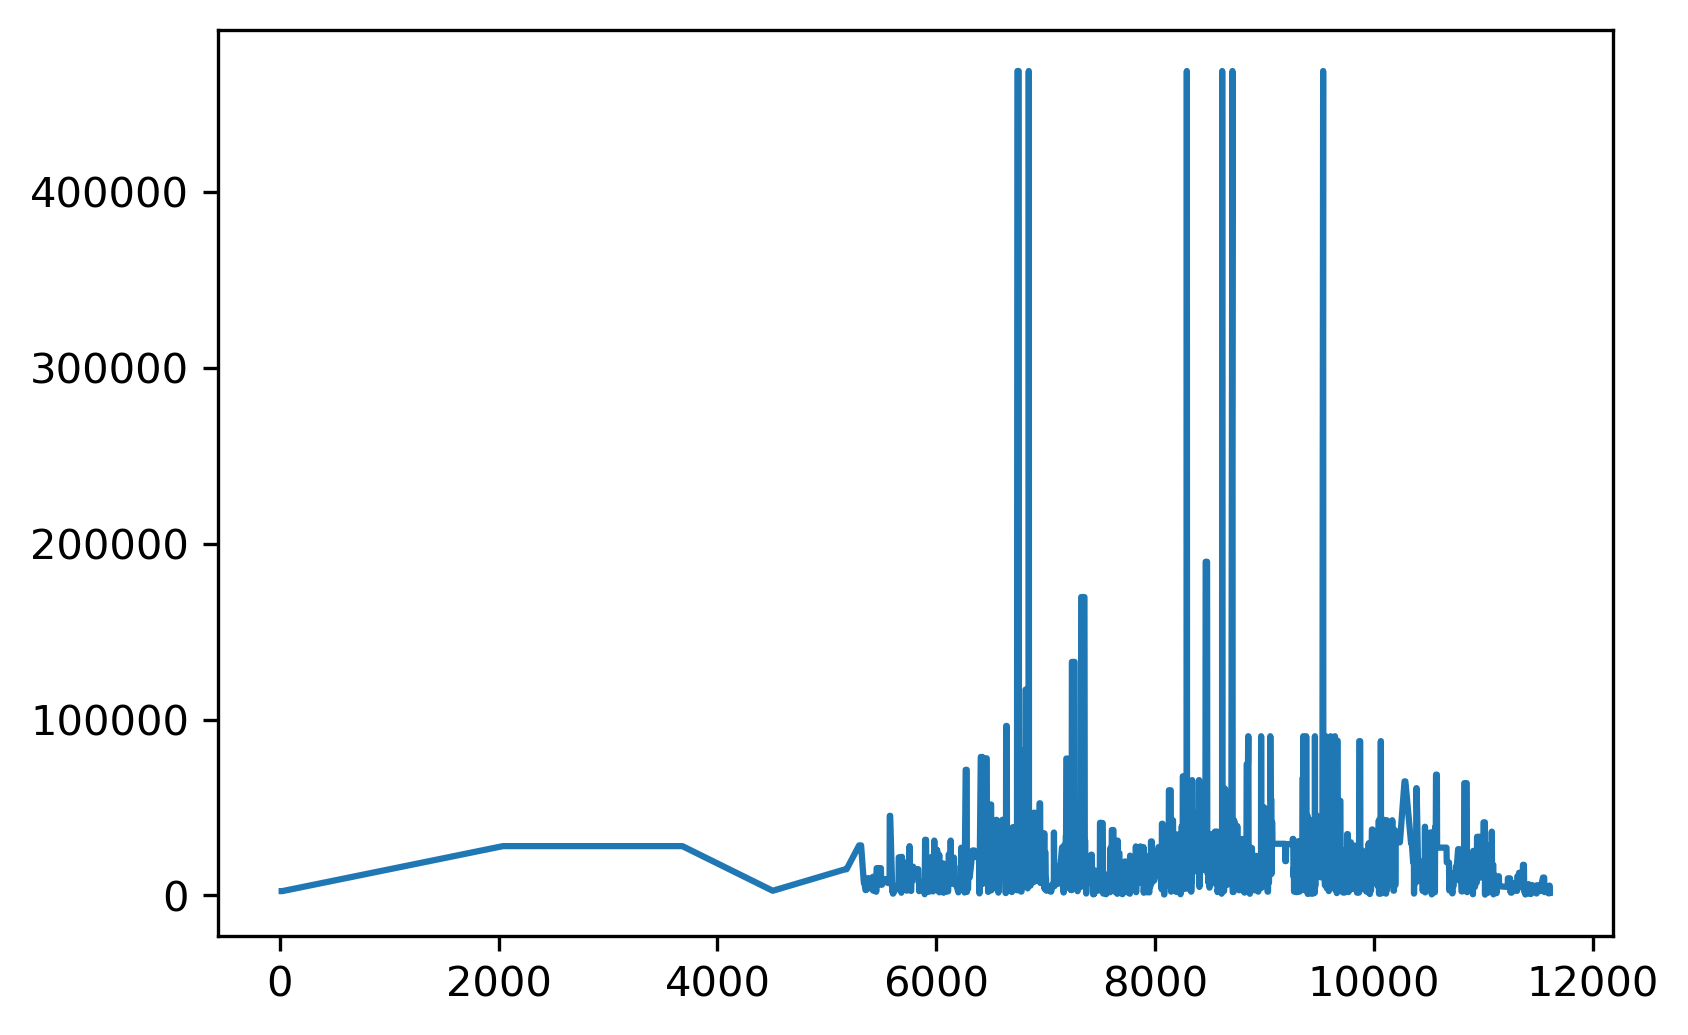

16       2404
17       2404
18       2404
19       2404
20       2404
         ... 
11606    5524
11607    5524
11608    5524
11609    1471
11610    1471
Name: album_listens, Length: 5219, dtype: int64

In [15]:
ts = df['album_listens']
plt.plot(ts)
plt.show()
ts

# TS DAY

In [16]:
df.reset_index(inplace = True, drop = True)
index_day = pd.date_range(start='2016-01-01', end='2016-12-31' , freq='D')
index_day

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [17]:
#consideration for 2016 year

ts_day=ts.sample(366)

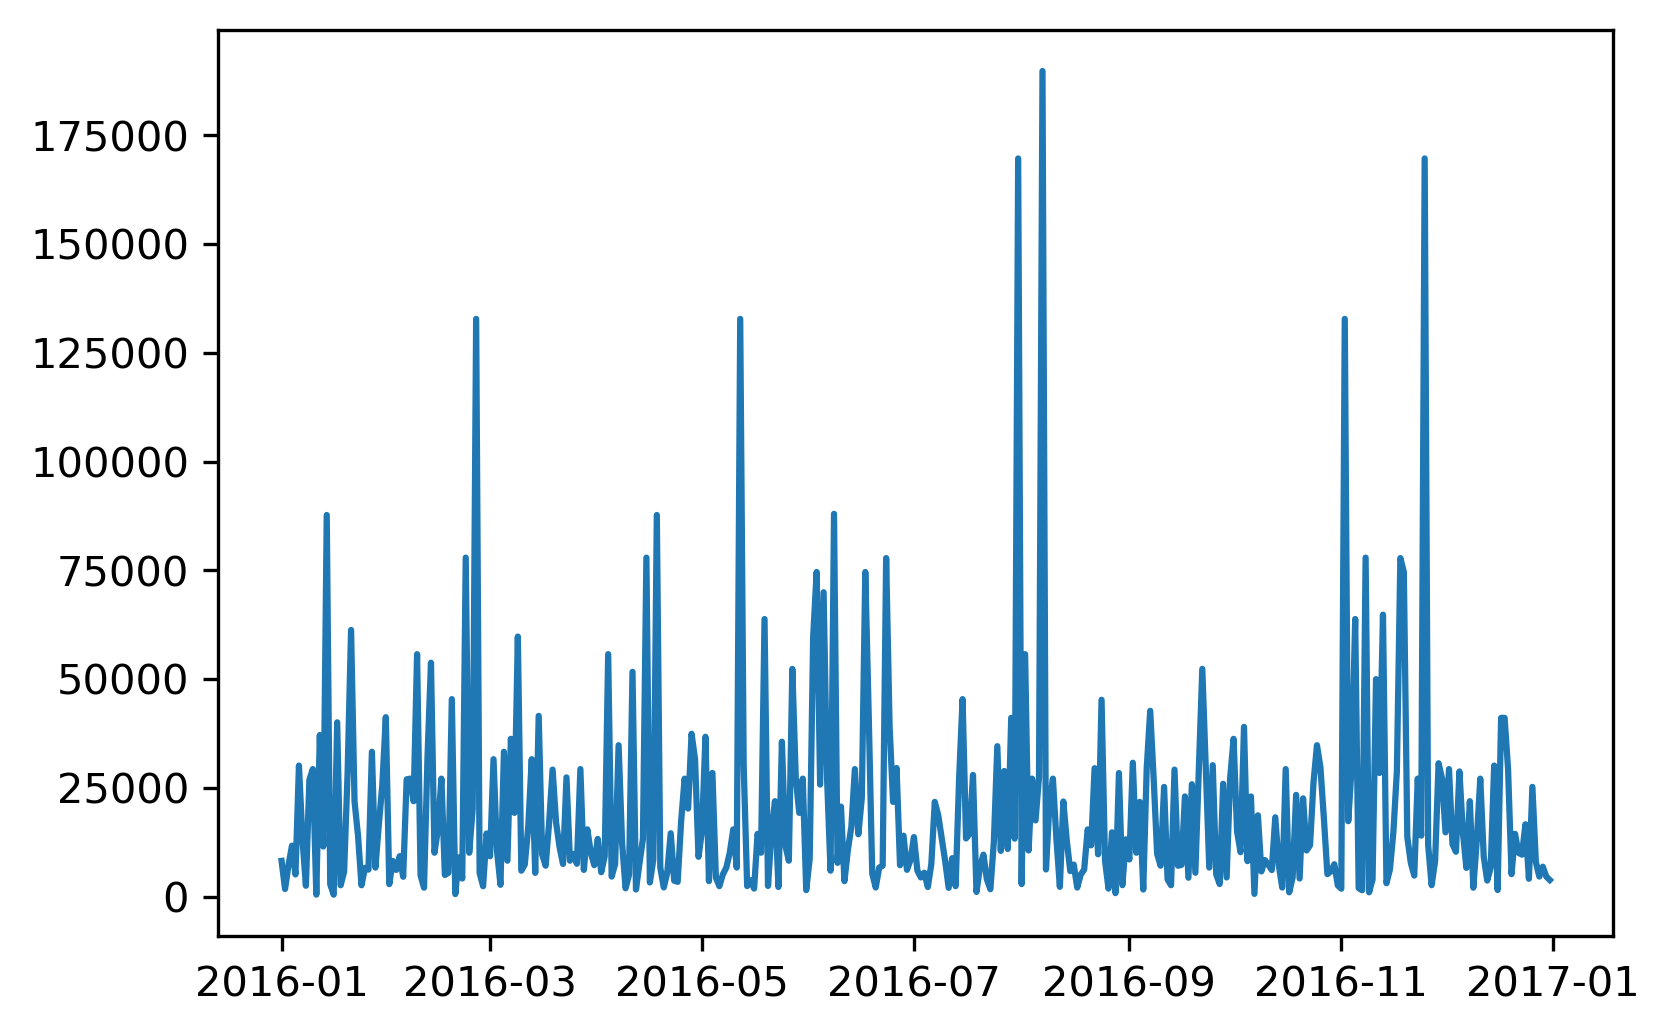

In [18]:
ts_day = pd.Series(ts_day.values, index_day)
plt.plot(ts_day)

plt.show()

# TS MONTH

In [19]:
df.reset_index(inplace = True, drop = True)
index_month = pd.date_range(start='2016-01-01', end='2016-12-31' , freq='M')
index_month

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [20]:
#consideration for 2016 year

ts_month=ts.sample(12)

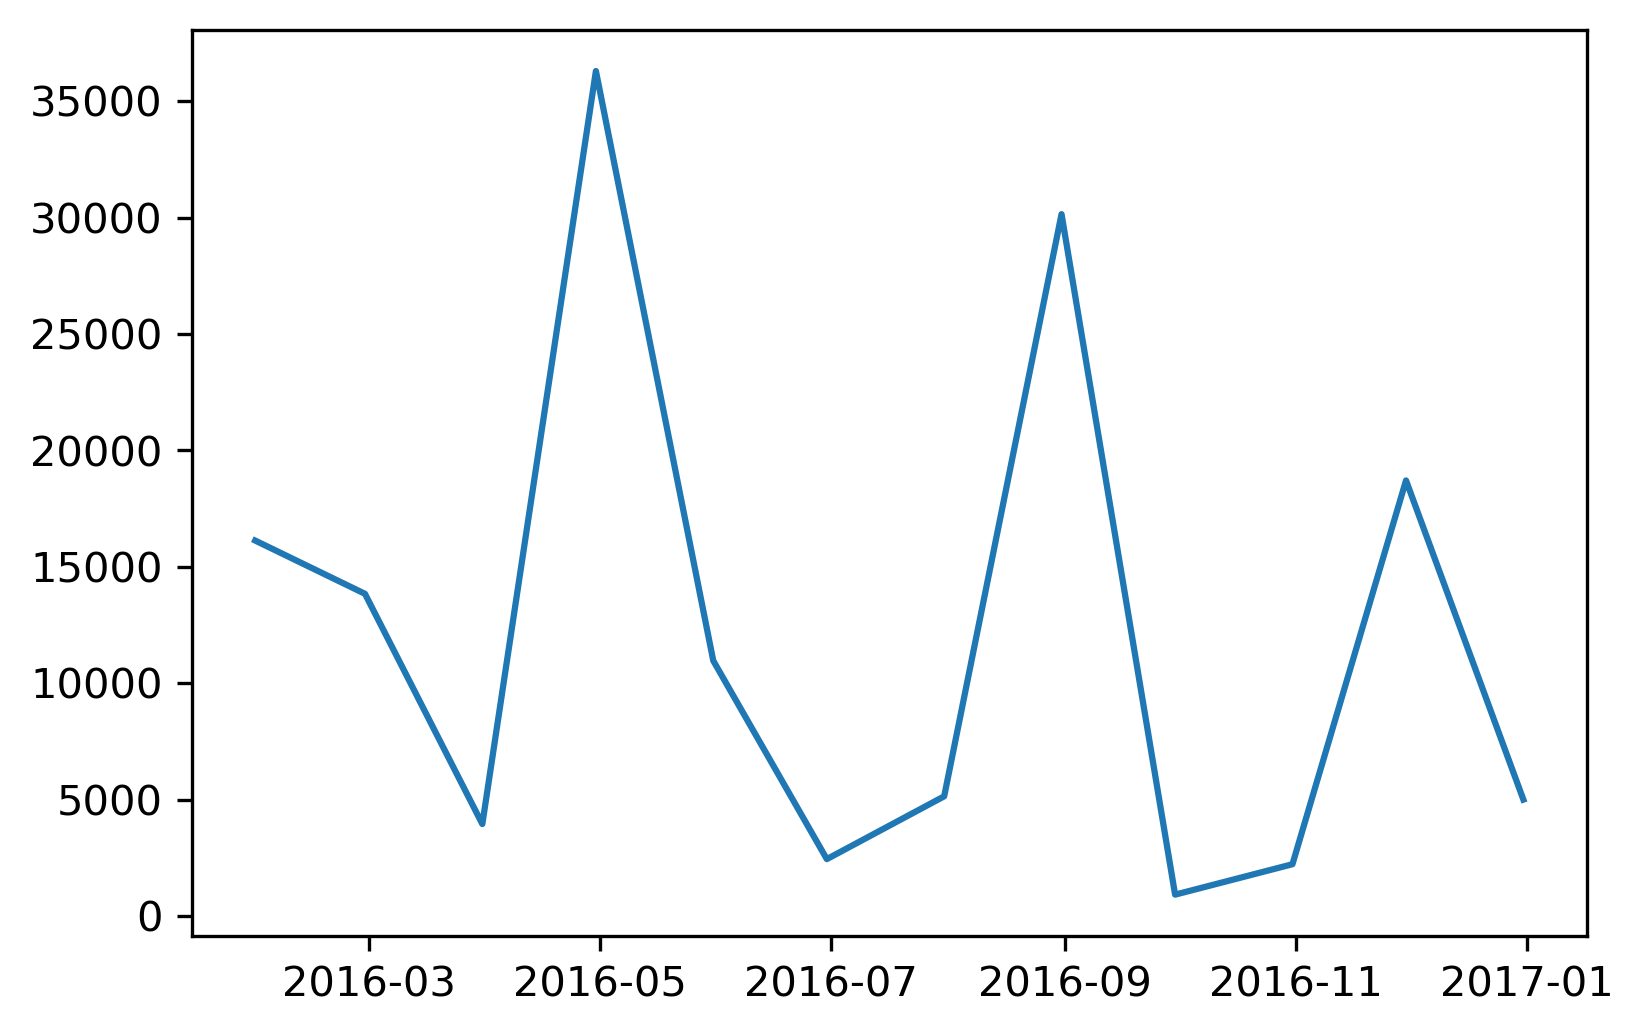

In [21]:
ts_month = pd.Series(ts_month.values, index_month)
plt.plot(ts_month)

plt.show()

# TS 10 YEARS

In [22]:
df.reset_index(inplace = True, drop = True)
index_yd = pd.date_range(start='2006-01-01', end='2016-12-31' , freq='D')
index_yd

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=4018, freq='D')

In [23]:
#consideration for 10 years with DAY

ts_years_day=ts.sample(4018)

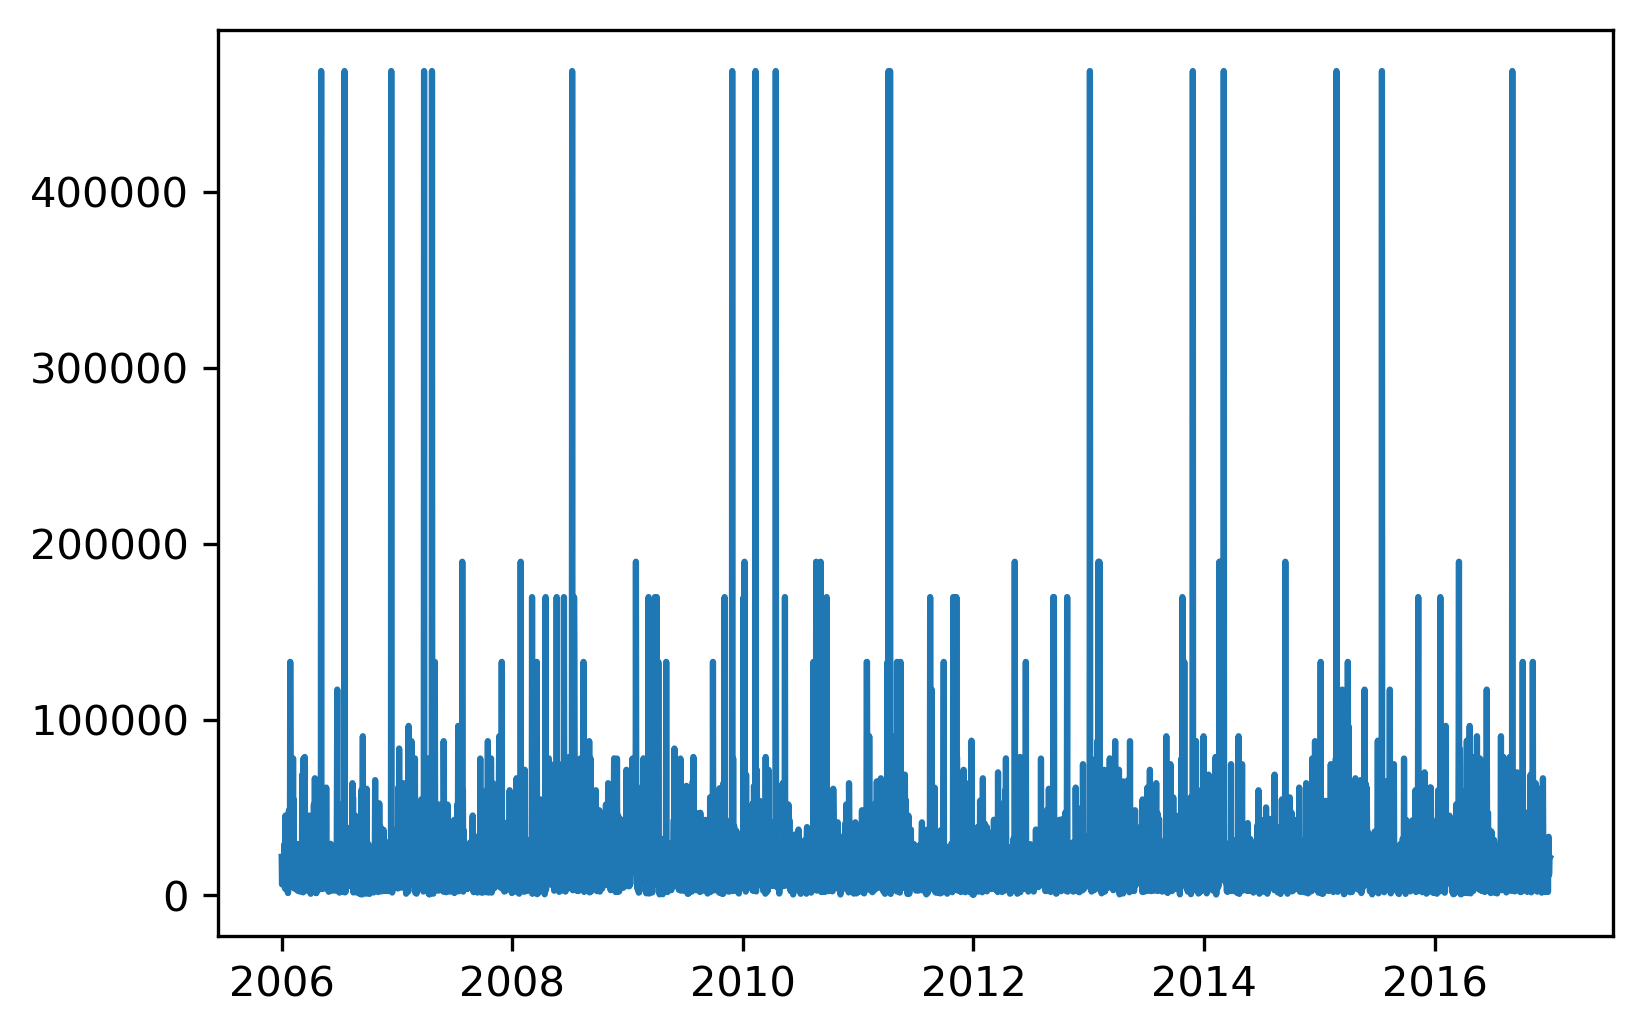

In [24]:
ts_years_day = pd.Series(ts_years_day.values, index_yd)
plt.plot(ts_years_day)

plt.show()

In [25]:
df.reset_index(inplace = True, drop = True)
index_ym = pd.date_range(start='2006-01-01', end='2016-12-31' , freq='M')
index_ym

DatetimeIndex(['2006-01-31', '2006-02-28', '2006-03-31', '2006-04-30',
               '2006-05-31', '2006-06-30', '2006-07-31', '2006-08-31',
               '2006-09-30', '2006-10-31',
               ...
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', length=132, freq='M')

In [26]:
#consideration for 10 years with MONTH

ts_years_month=ts.sample(132)

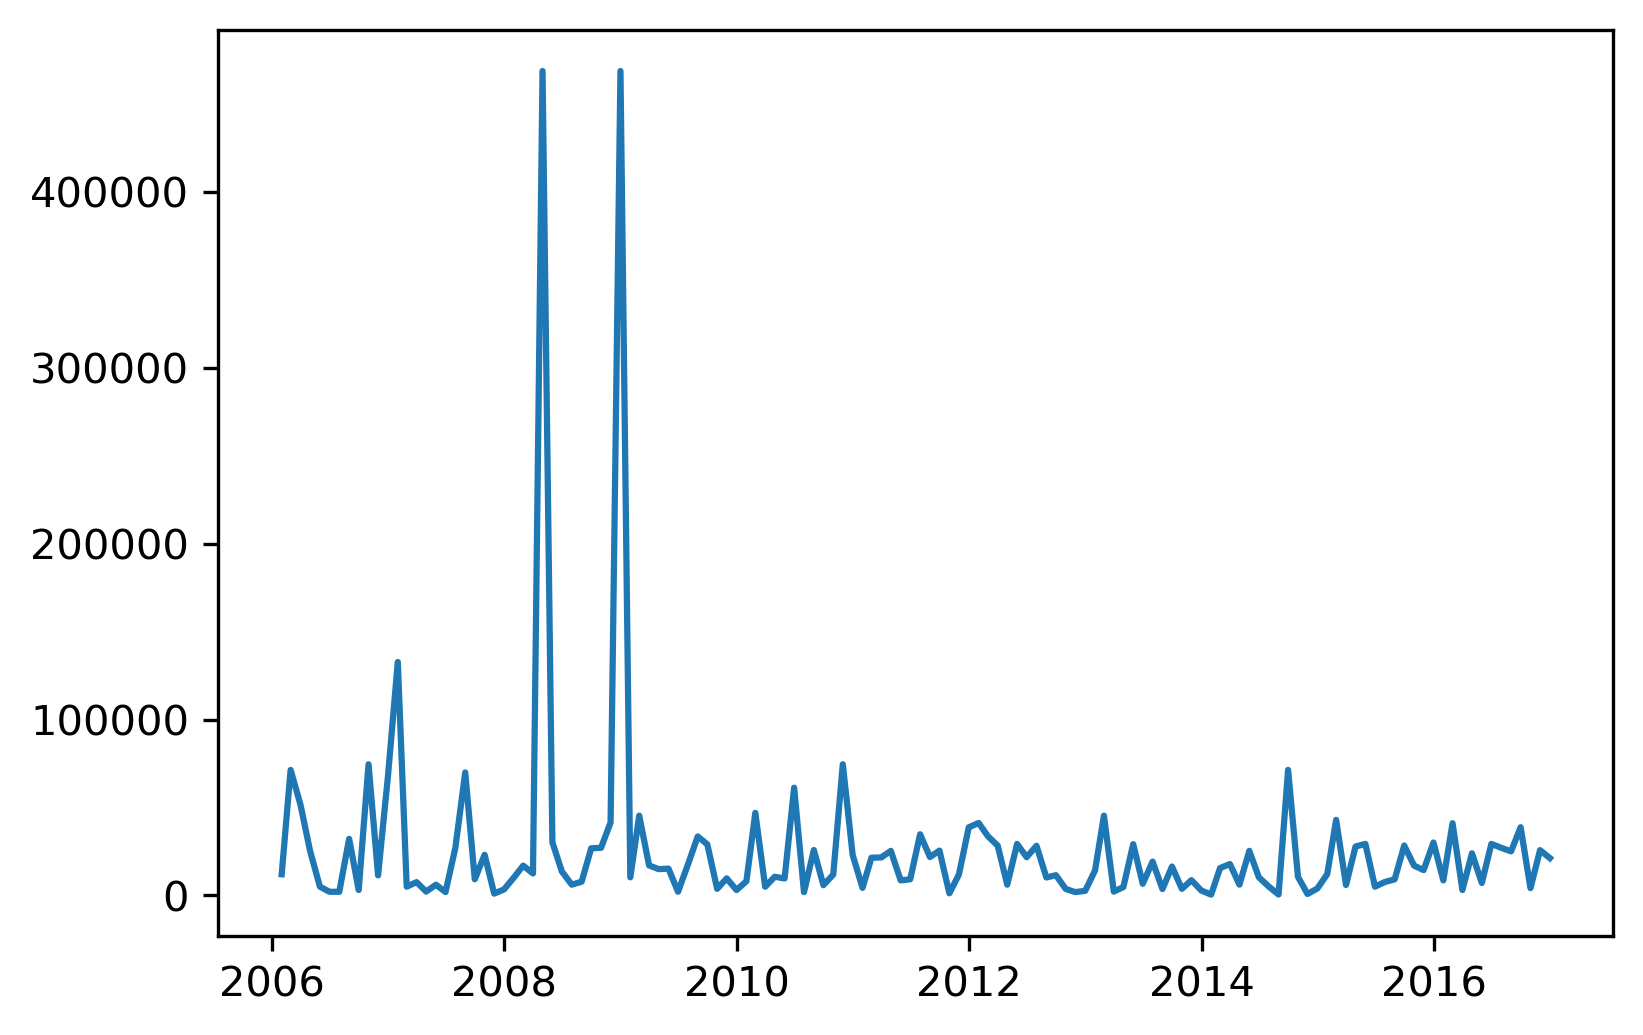

In [27]:
ts_years_month = pd.Series(ts_years_month.values, index_ym)
plt.plot(ts_years_month)

plt.show()

In [28]:
df.reset_index(inplace = True, drop = True)
index_yy = pd.date_range(start='2006-01-01', end='2016-12-31' , freq='Y')
index_yy

DatetimeIndex(['2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [31]:
#consideration for 10 years with YEAR

ts_years_y=ts.sample(11)

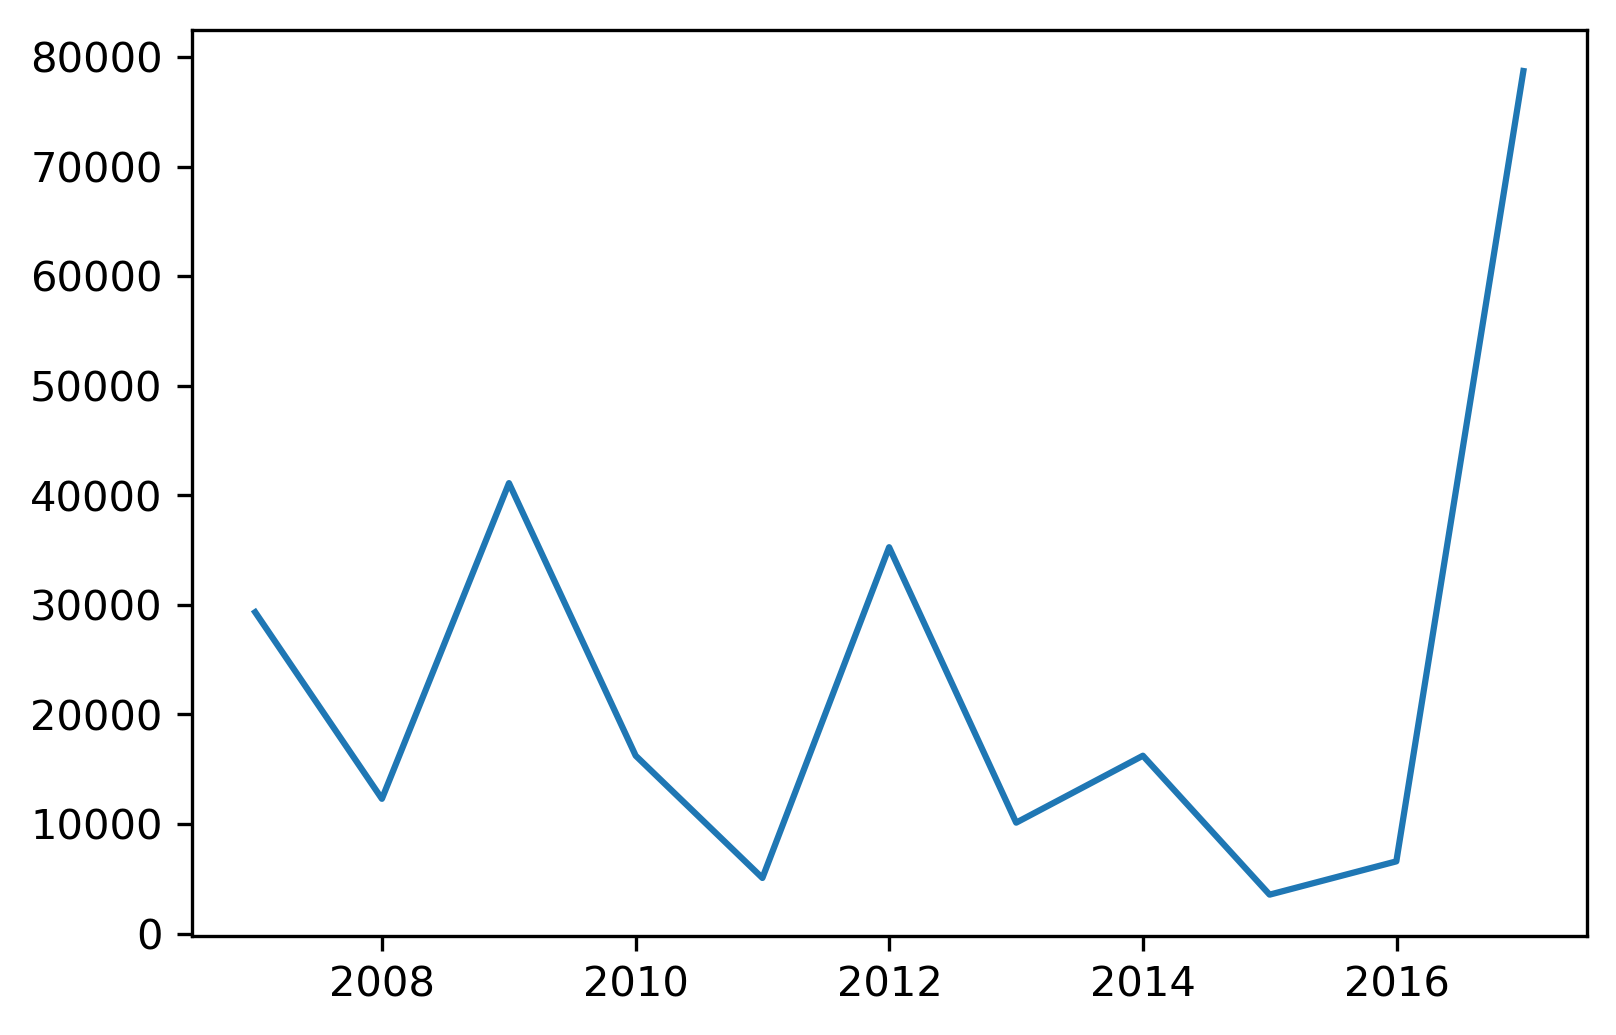

In [32]:
ts_years_y = pd.Series(ts_years_y.values, index_yy)
plt.plot(ts_years_y)

plt.show()

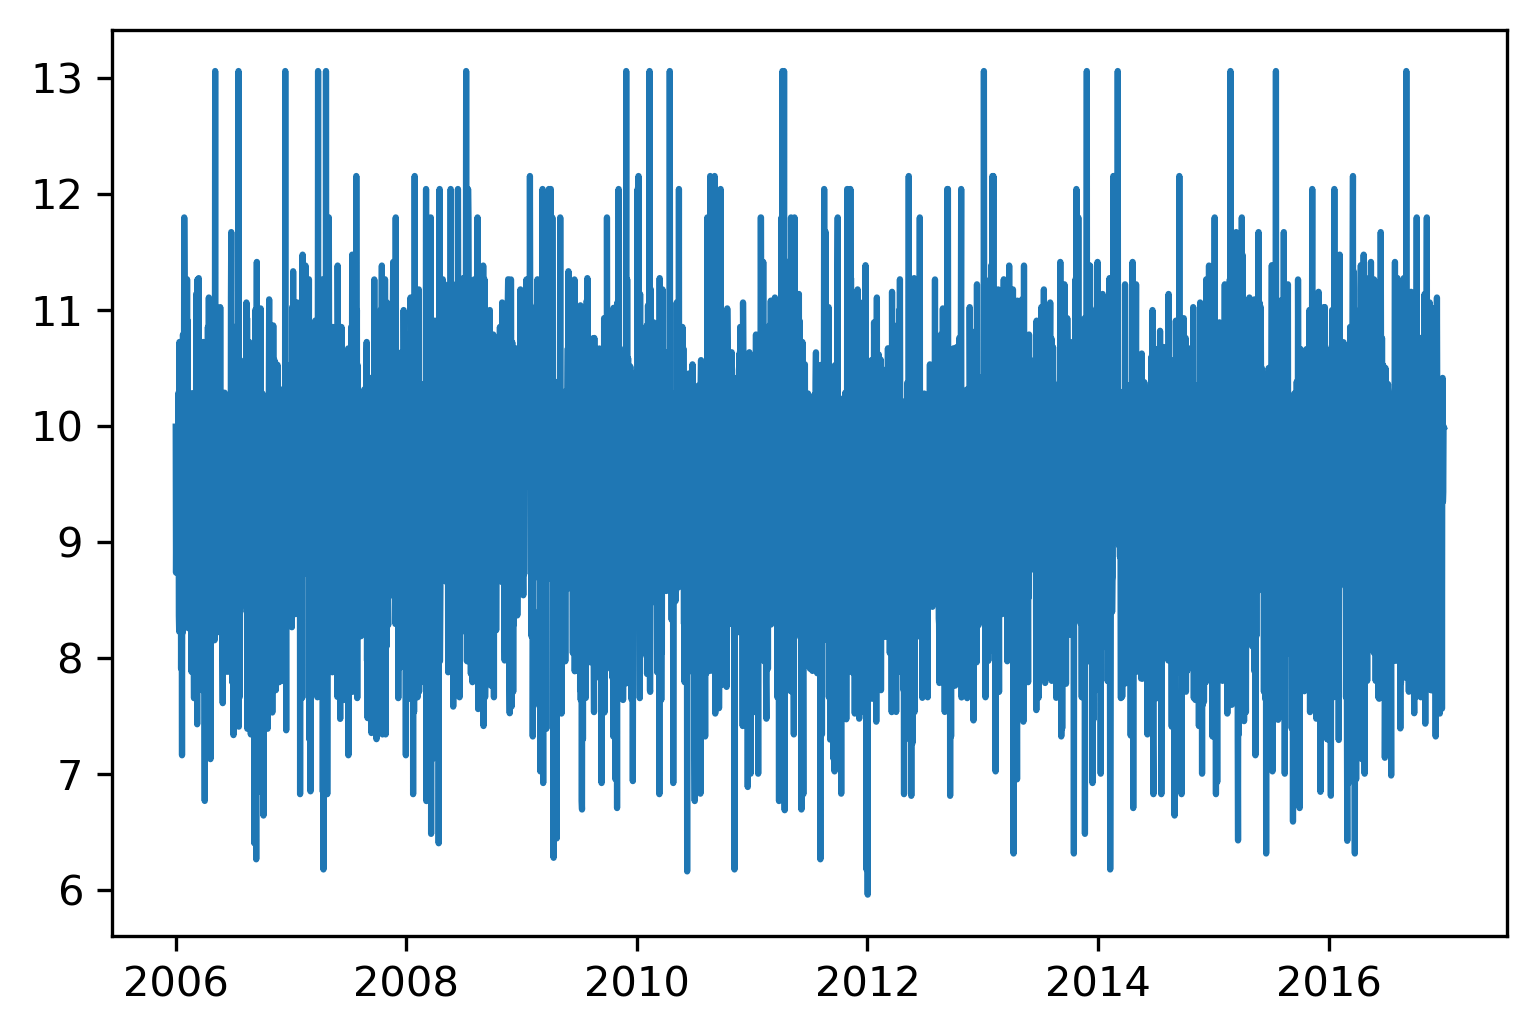

In [33]:
ts_log = pd.Series(np.log(ts_years_day), index=ts_years_day.index)
plt.plot(ts_log)
plt.show()

# Log Mean Diff Tranformation

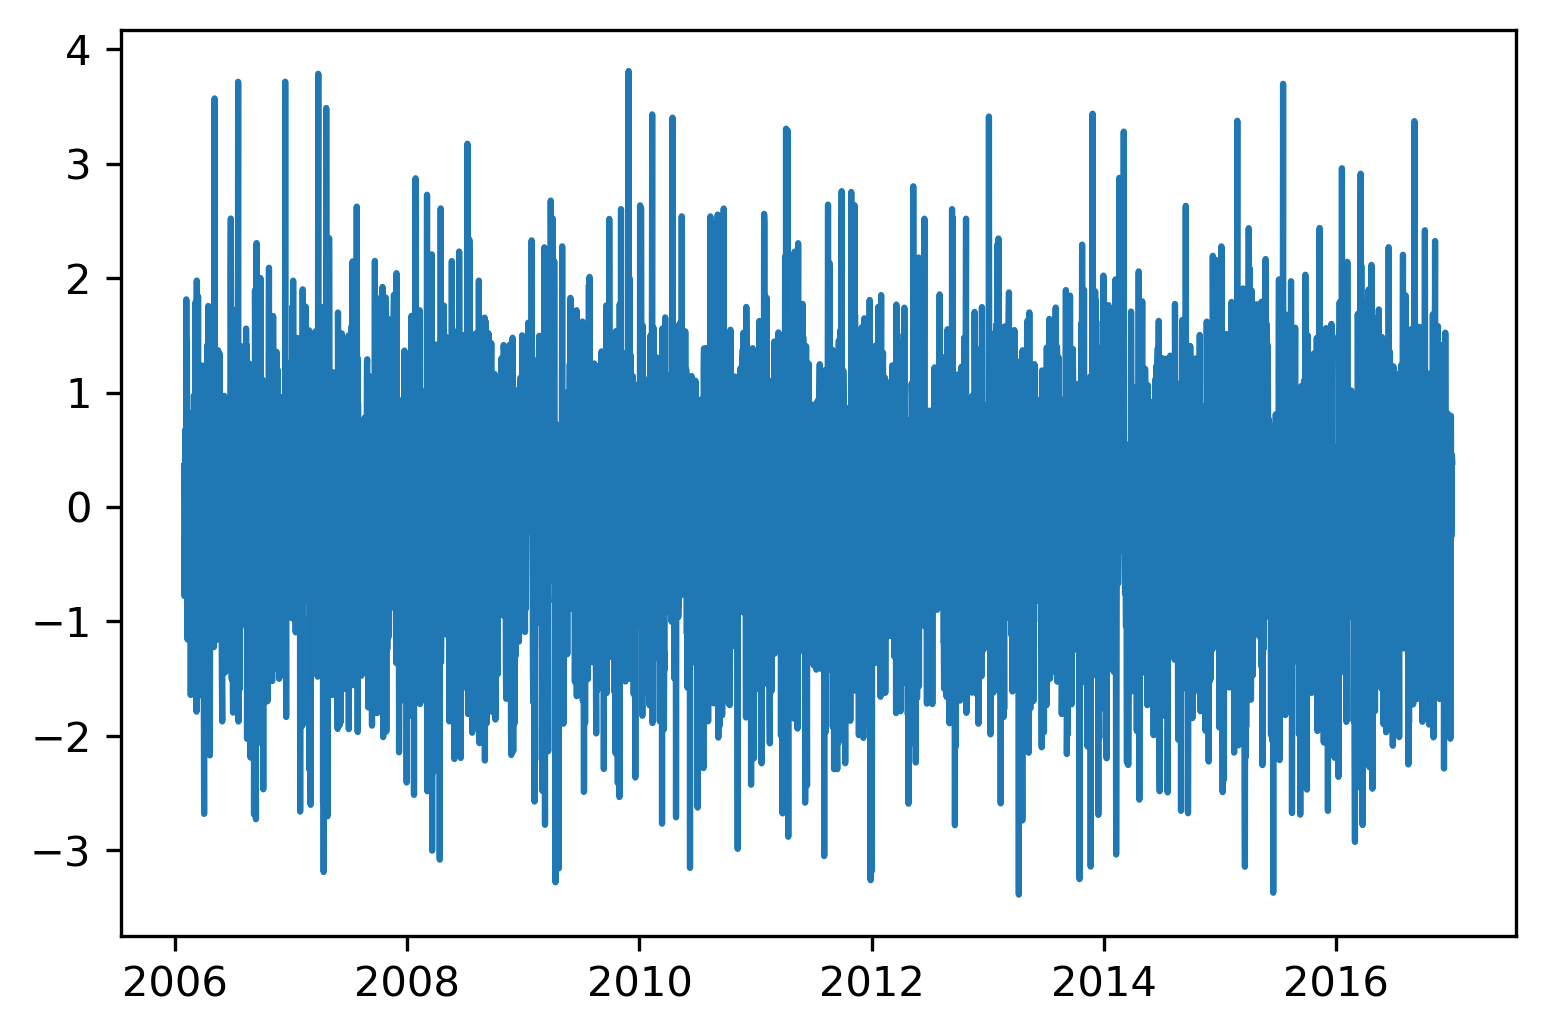

In [34]:
window = 30

ts_log_mov_diff = pd.Series(ts_log - ts_log.rolling(window, center=False).mean(), index=ts_years_day.index)
plt.plot(ts_log_mov_diff)
plt.show()

### Autocorrelation and Partial Autocorrelation TS YEARS DAY

In [35]:
from statsmodels.tsa.stattools import acf, pacf

In [36]:
lag_acf = acf(ts_years_day, nlags=20)
lag_pacf = pacf(ts_years_day, nlags=20, method='ols')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


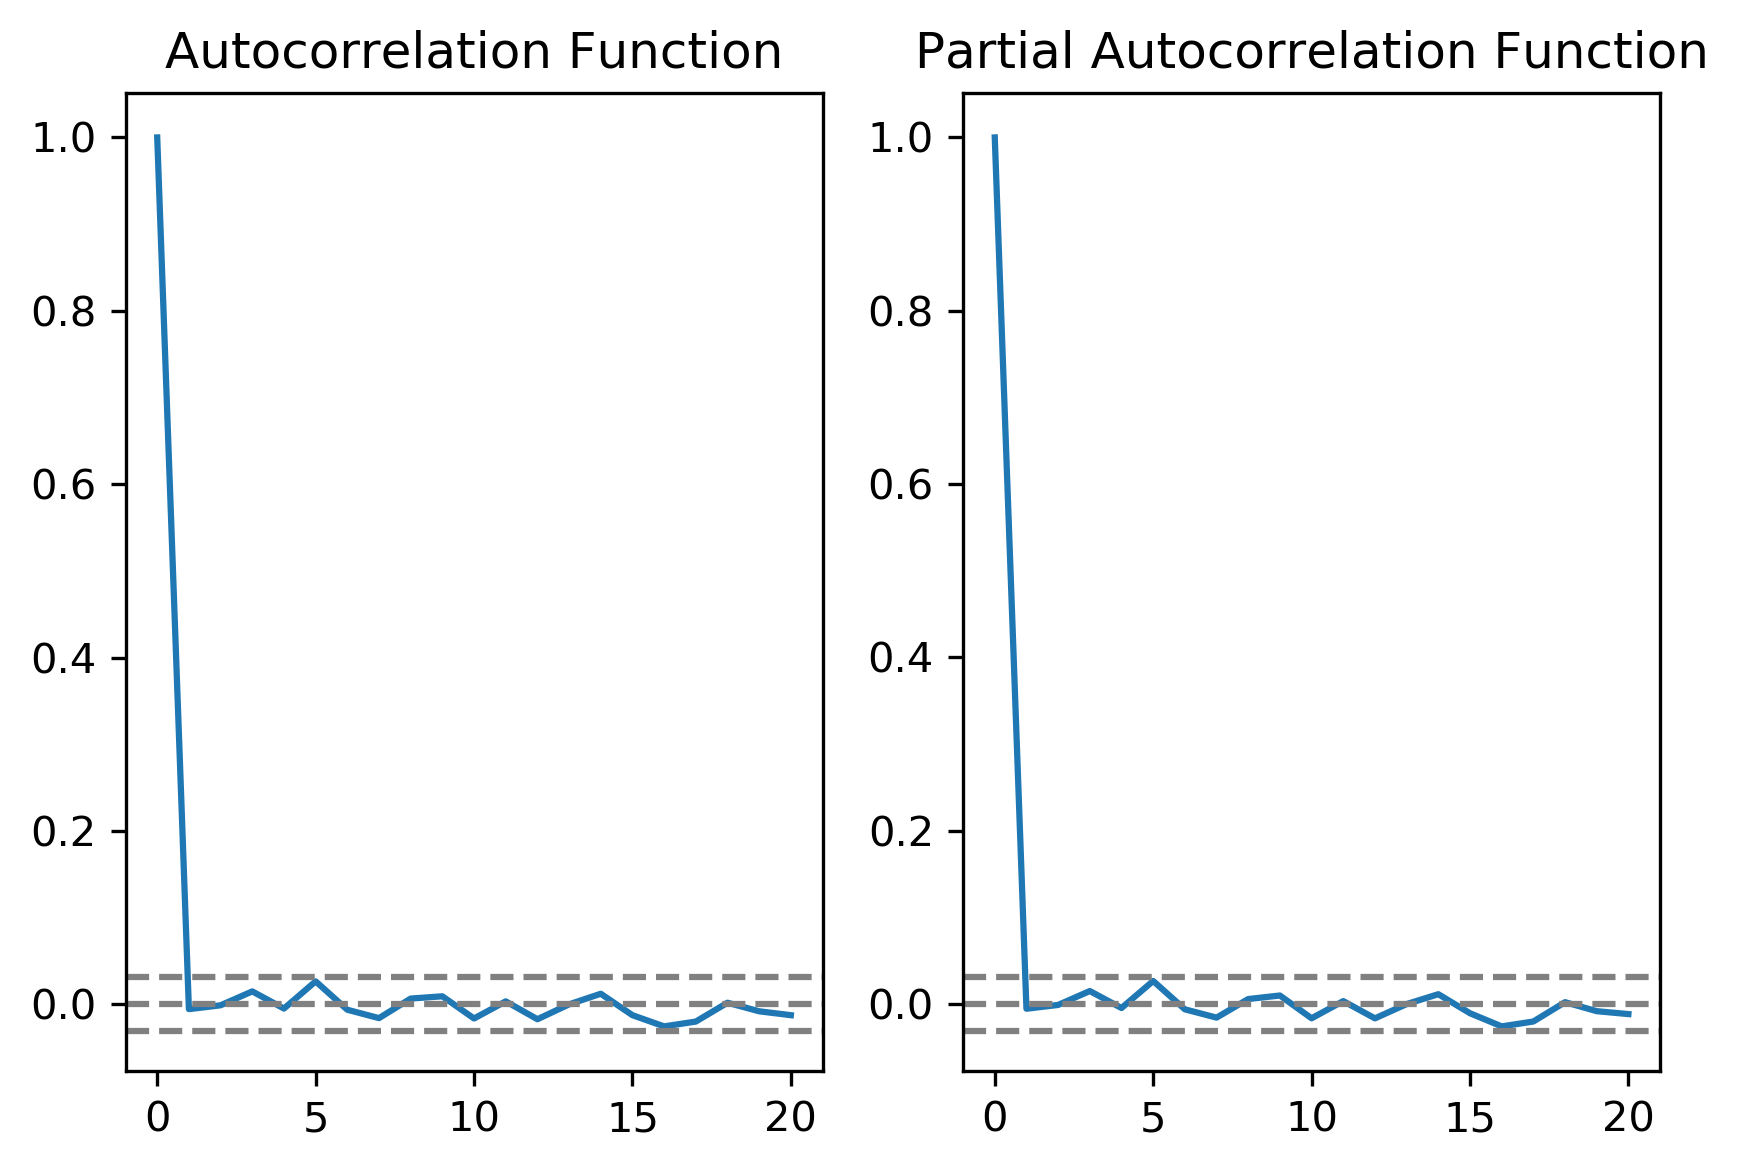

In [37]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_years_day)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_years_day)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_years_day)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_years_day)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

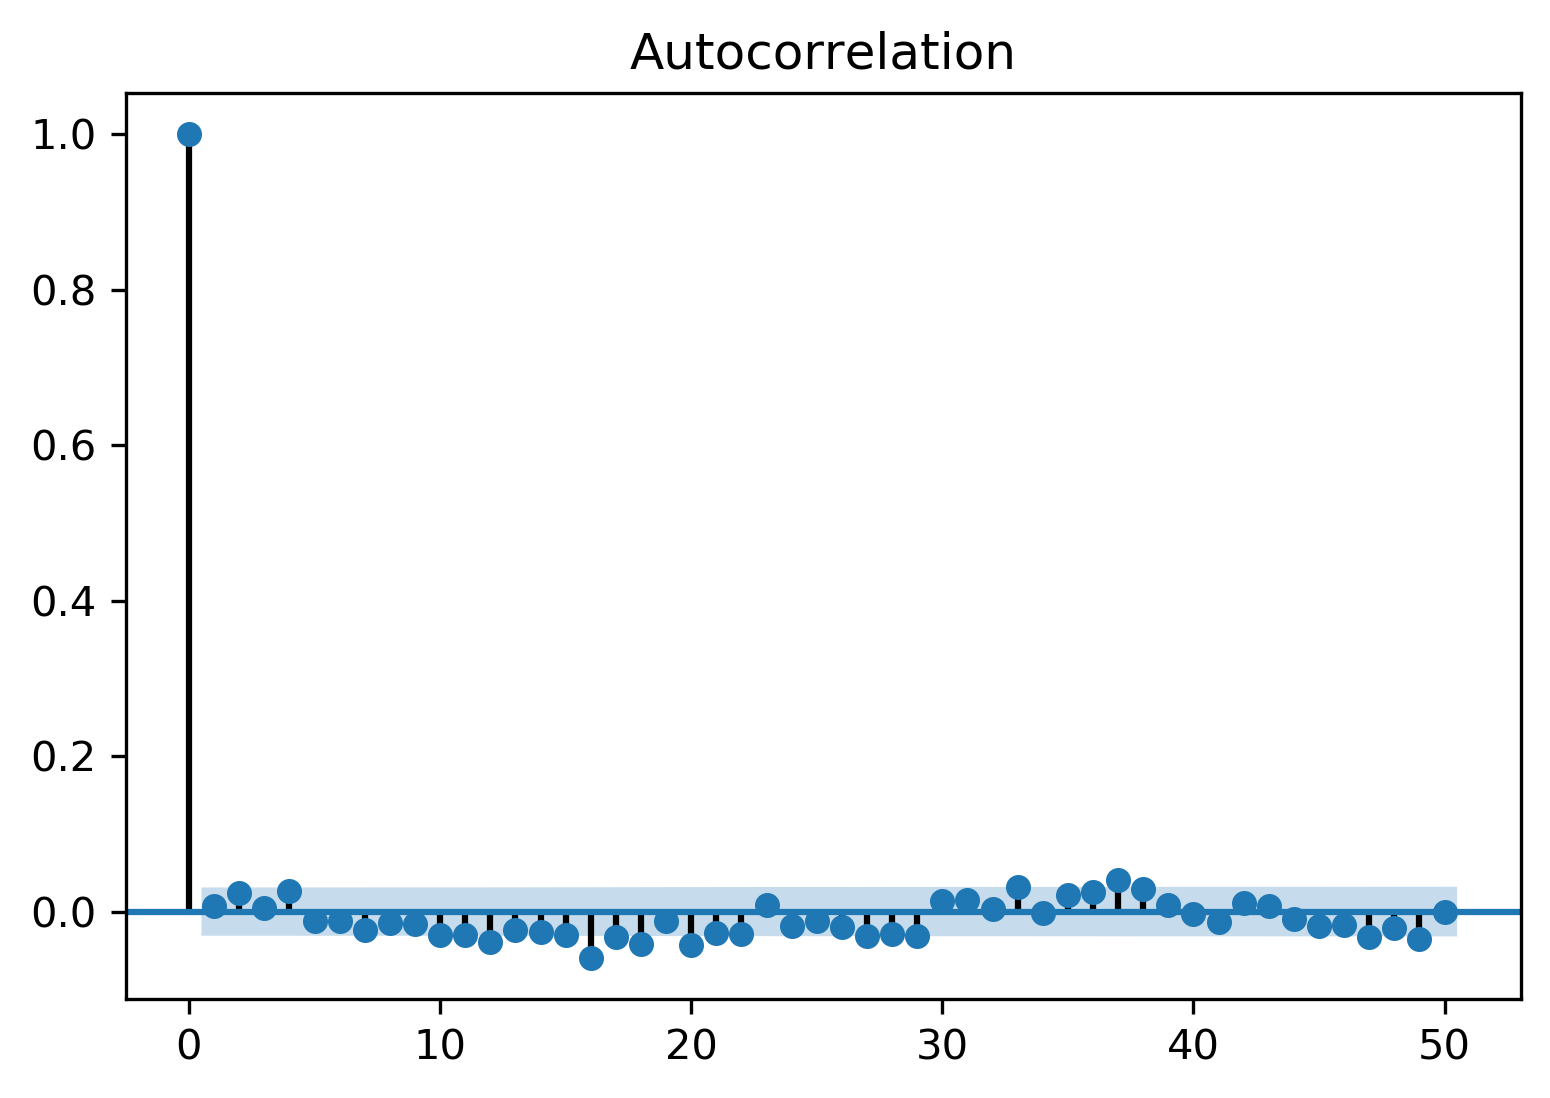

In [39]:
plot_acf(ts_log_mov_diff.values[29:], lags=50)
plt.show()

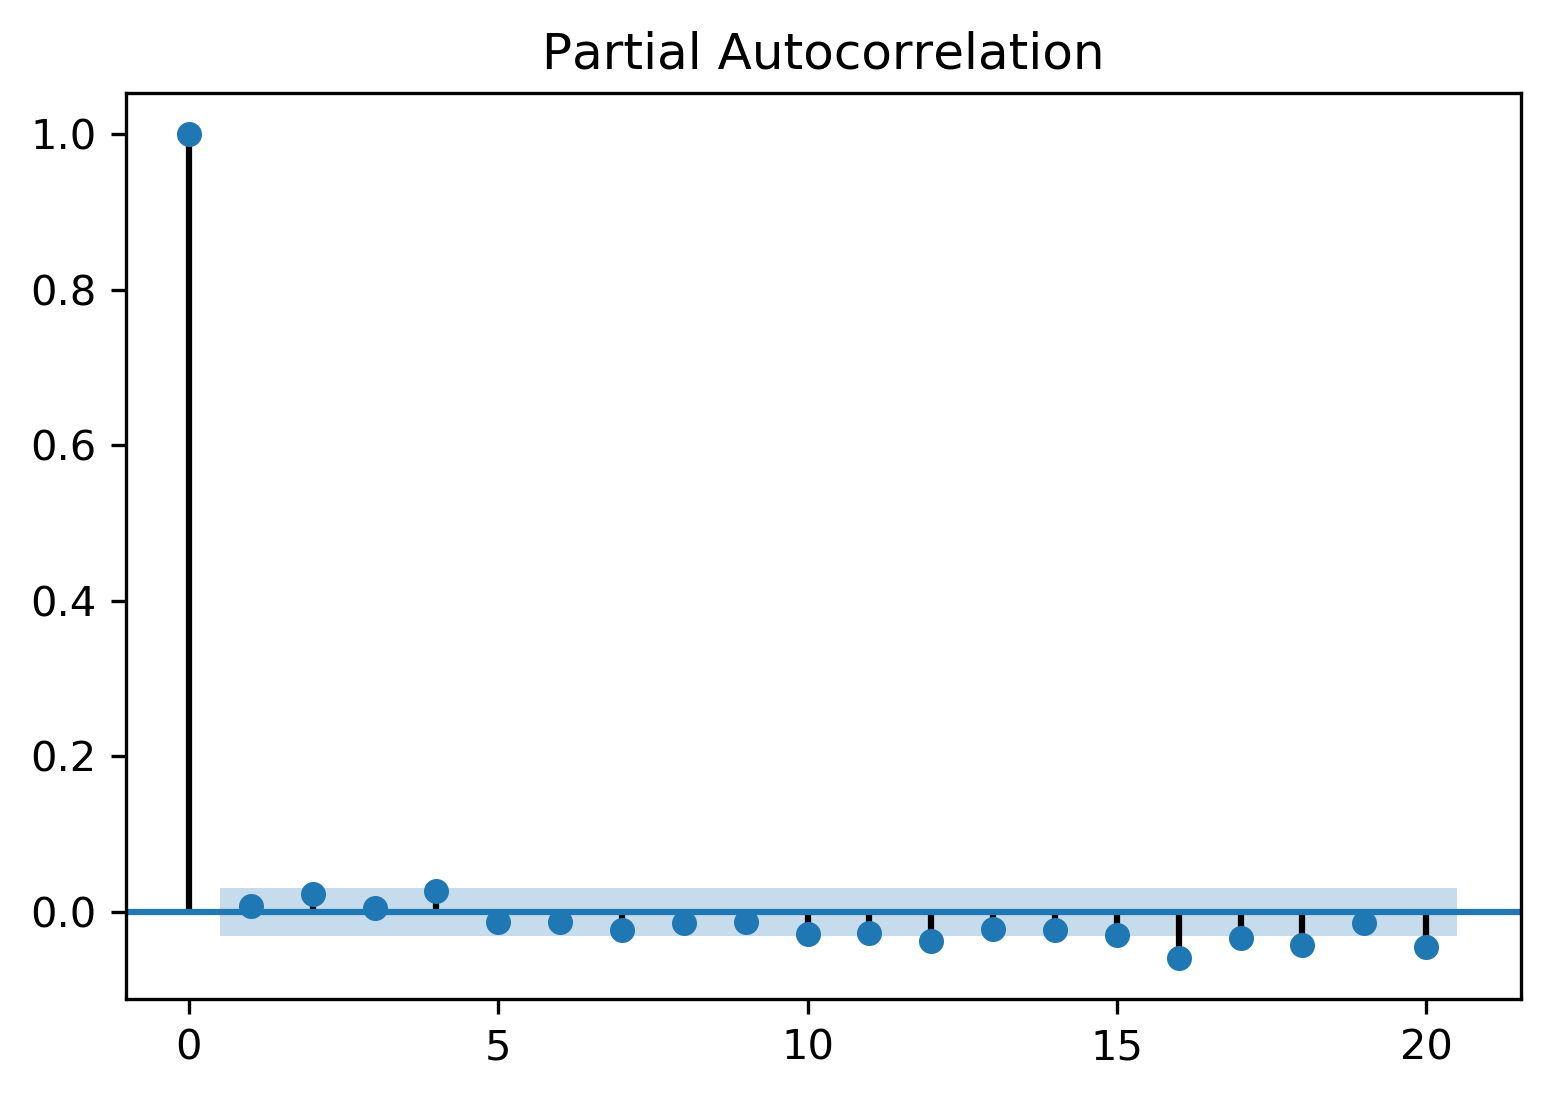

In [40]:
plot_pacf(ts_log_mov_diff.values[29:], lags=20)
plt.show()

### Stationarity 
The Augmented Dickey-Fuller unit root test (http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html).
Estimates whether the time series has a time-dependent structure (non-stationary, i.e. affected by trend, seasonality and other phenomena that make the statistics of the time series to vary in time) or not (stationary), which are related to (though quite different from) periodicity and autocorrelation.

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
dftest = adfuller(ts, autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.198929e+01
p-value                        3.552050e-22
#Lags Used                     1.700000e+01
Number of Observations Used    5.201000e+03
Critical Value (1%)           -3.431608e+00
Critical Value (5%)           -2.862096e+00
Critical Value (10%)          -2.567066e+00
dtype: float64


In [43]:
dftest = adfuller(ts_log, autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -29.947574
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    4014.000000
Critical Value (1%)              -3.431980
Critical Value (5%)              -2.862260
Critical Value (10%)             -2.567153
dtype: float64


In [44]:
dftest = adfuller(ts_log_mov_diff.values[29:], autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.772345e+01
p-value                        3.460088e-30
#Lags Used                     2.800000e+01
Number of Observations Used    3.960000e+03
Critical Value (1%)           -3.432002e+00
Critical Value (5%)           -2.862270e+00
Critical Value (10%)          -2.567159e+00
dtype: float64


### Decomposition

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [48]:
df.reset_index(inplace = True, drop = True)
index_yd = pd.date_range(start='2006-01-01', end='2016-12-31' , freq='D')
index_yd

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=4018, freq='D')

In [50]:
ts_years_day_def = pd.Series(ts_years_day.values, index_yd)

In [51]:
tsx =ts_years_day_def.copy()
todrop = [i for i in tsx.index if i.day<1 or i.day >= 31]
tsx.drop(todrop, inplace =True)
tsx

2006-01-01    21886
2006-01-02     6221
2006-01-03    10235
2006-01-04    20207
2006-01-05    17109
              ...  
2016-12-26    30238
2016-12-27    33320
2016-12-28    11449
2016-12-29    12474
2016-12-30    21958
Length: 3941, dtype: int64

In [52]:
help(seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series. Must be used if x is not a pandas object or if
        the index of x does not have  a frequency. Overrides default
        periodicity of x if x is a pandas object with a timeseries index.
    two_sided : bool, optional
        The moving a

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


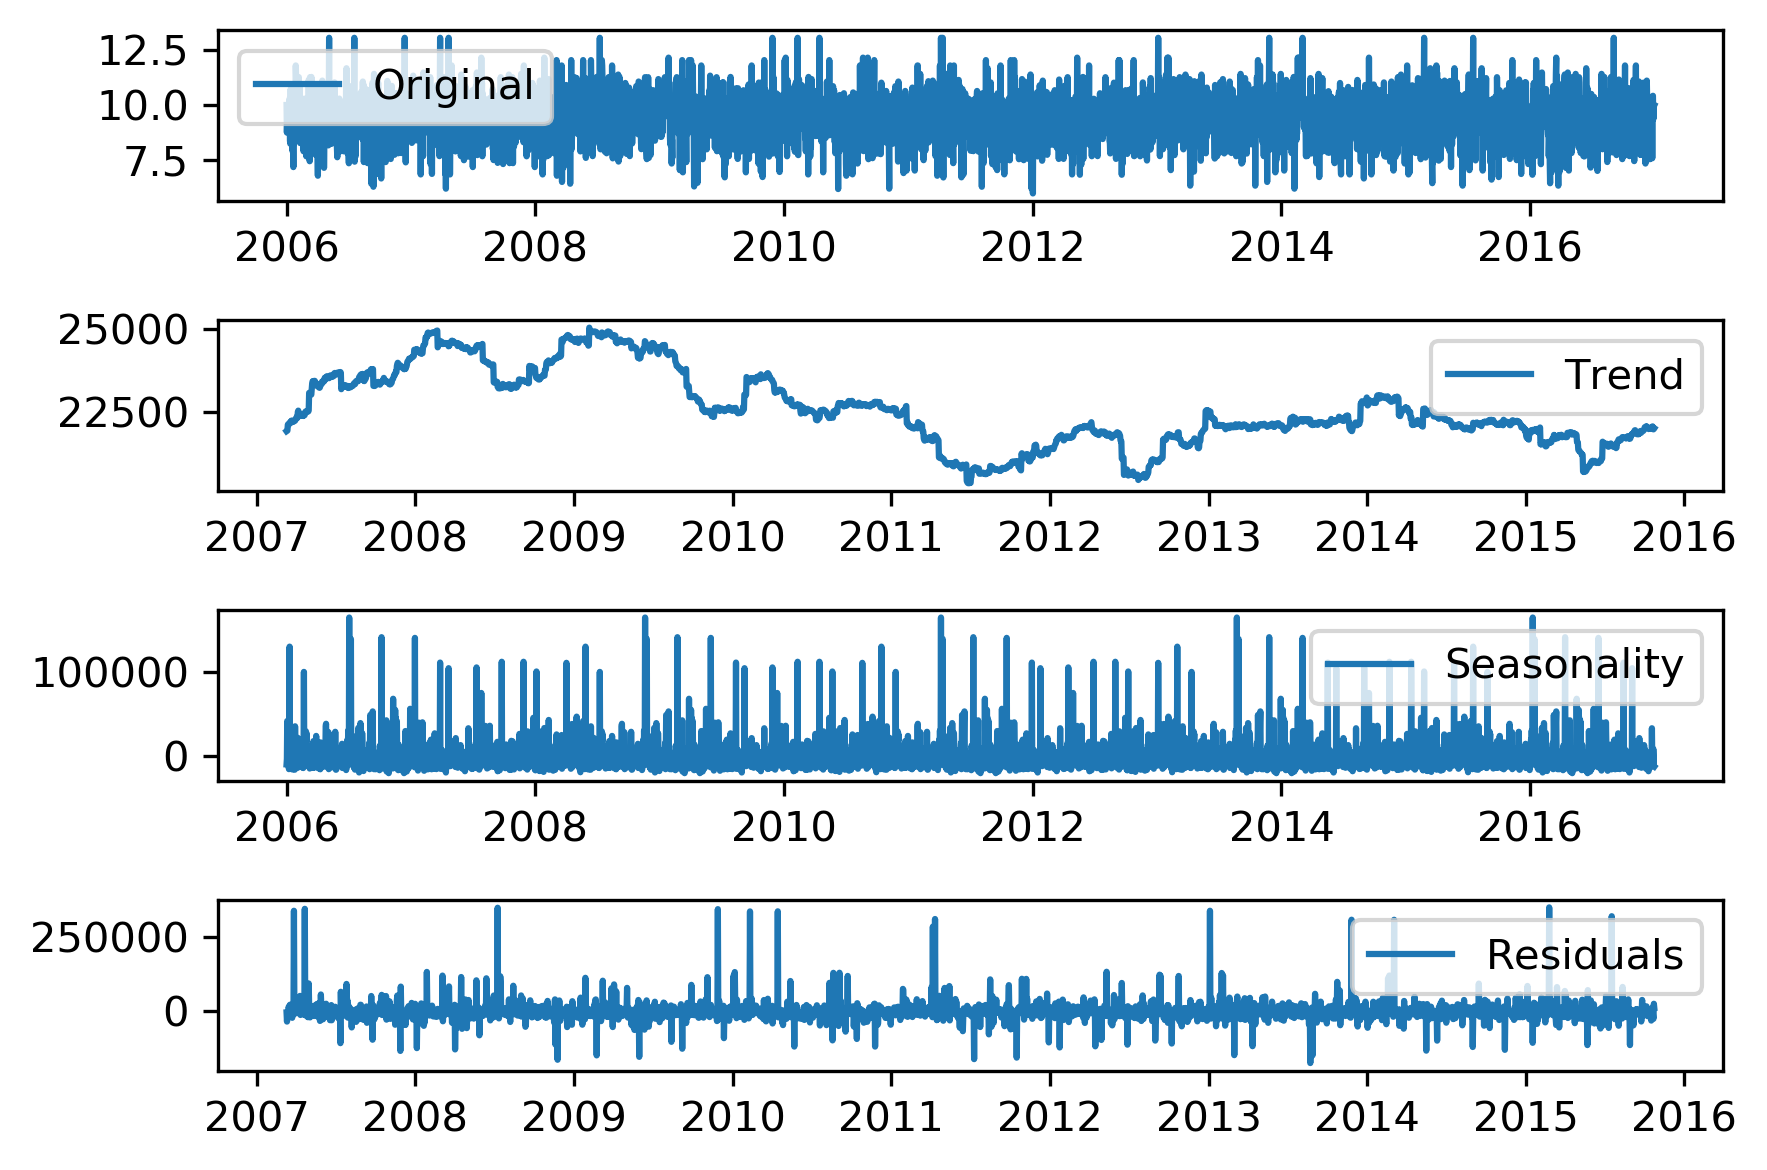

In [53]:
decomposition = seasonal_decompose(ts_years_day_def, freq = (len(ts))//6)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [54]:
residual.describe()

count      3150.000000
mean        191.290034
std       32379.371931
min     -172079.795505
25%       -9772.795912
50%       -2104.715240
75%        7139.546939
max      347210.392163
Name: resid, dtype: float64

In [55]:
residual

2006-01-01   NaN
2006-01-02   NaN
2006-01-03   NaN
2006-01-04   NaN
2006-01-05   NaN
              ..
2016-12-27   NaN
2016-12-28   NaN
2016-12-29   NaN
2016-12-30   NaN
2016-12-31   NaN
Freq: D, Name: resid, Length: 4018, dtype: float64

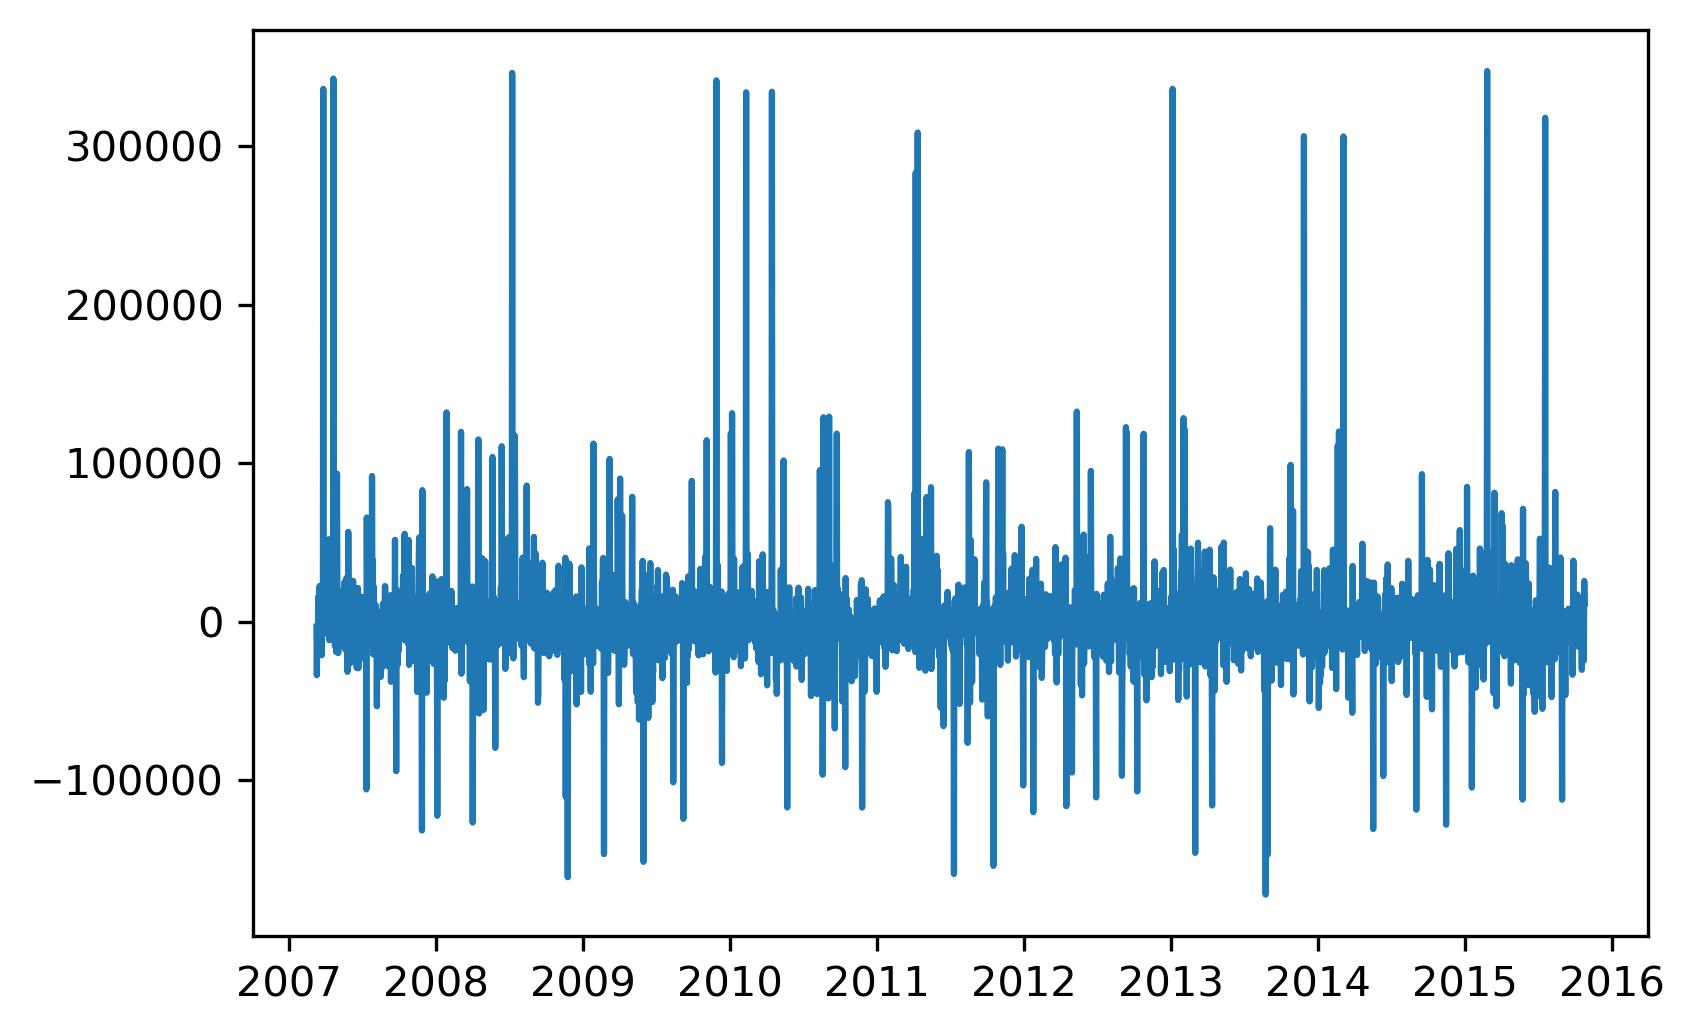

In [56]:
plt.plot(residual)

# Forecasting

In [59]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error


def r2_score(y_true, y_pred, ts):
    mu = np.mean(ts)
    total = np.sum((y_true - mu) ** 2)
    residuals = np.sum((y_true - y_pred) ** 2)
    return 1 - (residuals / total)


def absolute_percentage_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_pred)


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(absolute_percentage_error(y_true, y_pred))


def max_absolute_percentage_error(y_true, y_pred):
    return np.max(absolute_percentage_error(y_true, y_pred))


def total_absolute_percentage_error(y_true, y_pred):
    return np.sum(absolute_percentage_error(y_true, y_pred))


def evaluate(y_true, y_pred, ts):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAD': median_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred, ts),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'MAXAPE': max_absolute_percentage_error(y_true, y_pred),
        'TAPE': total_absolute_percentage_error(y_true, y_pred)
    }

In [61]:
len(ts_years_day) *9/10

3616.2

In [74]:
split_index = 3800
train, test = ts_years_day.iloc[:split_index], ts_years_day.iloc[split_index:]

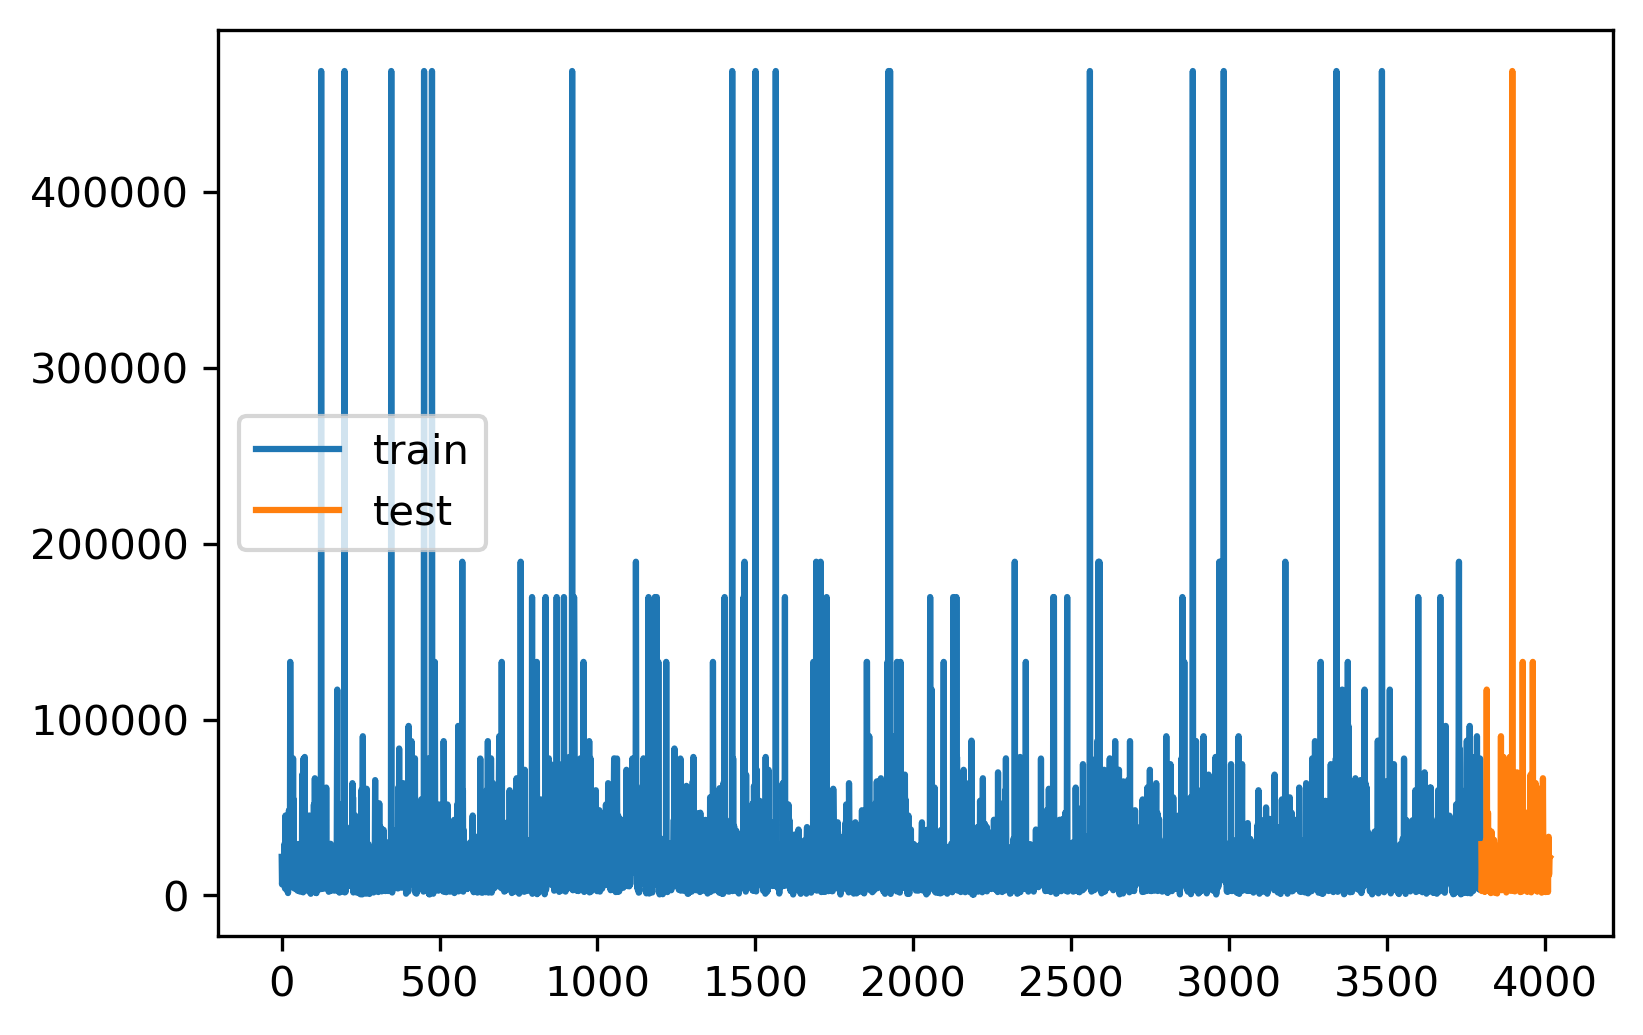

In [75]:
plt.plot(range(split_index), train, label='train')
plt.plot(range(split_index, len(ts_years_day)), test, label='test')
plt.legend()
plt.show()

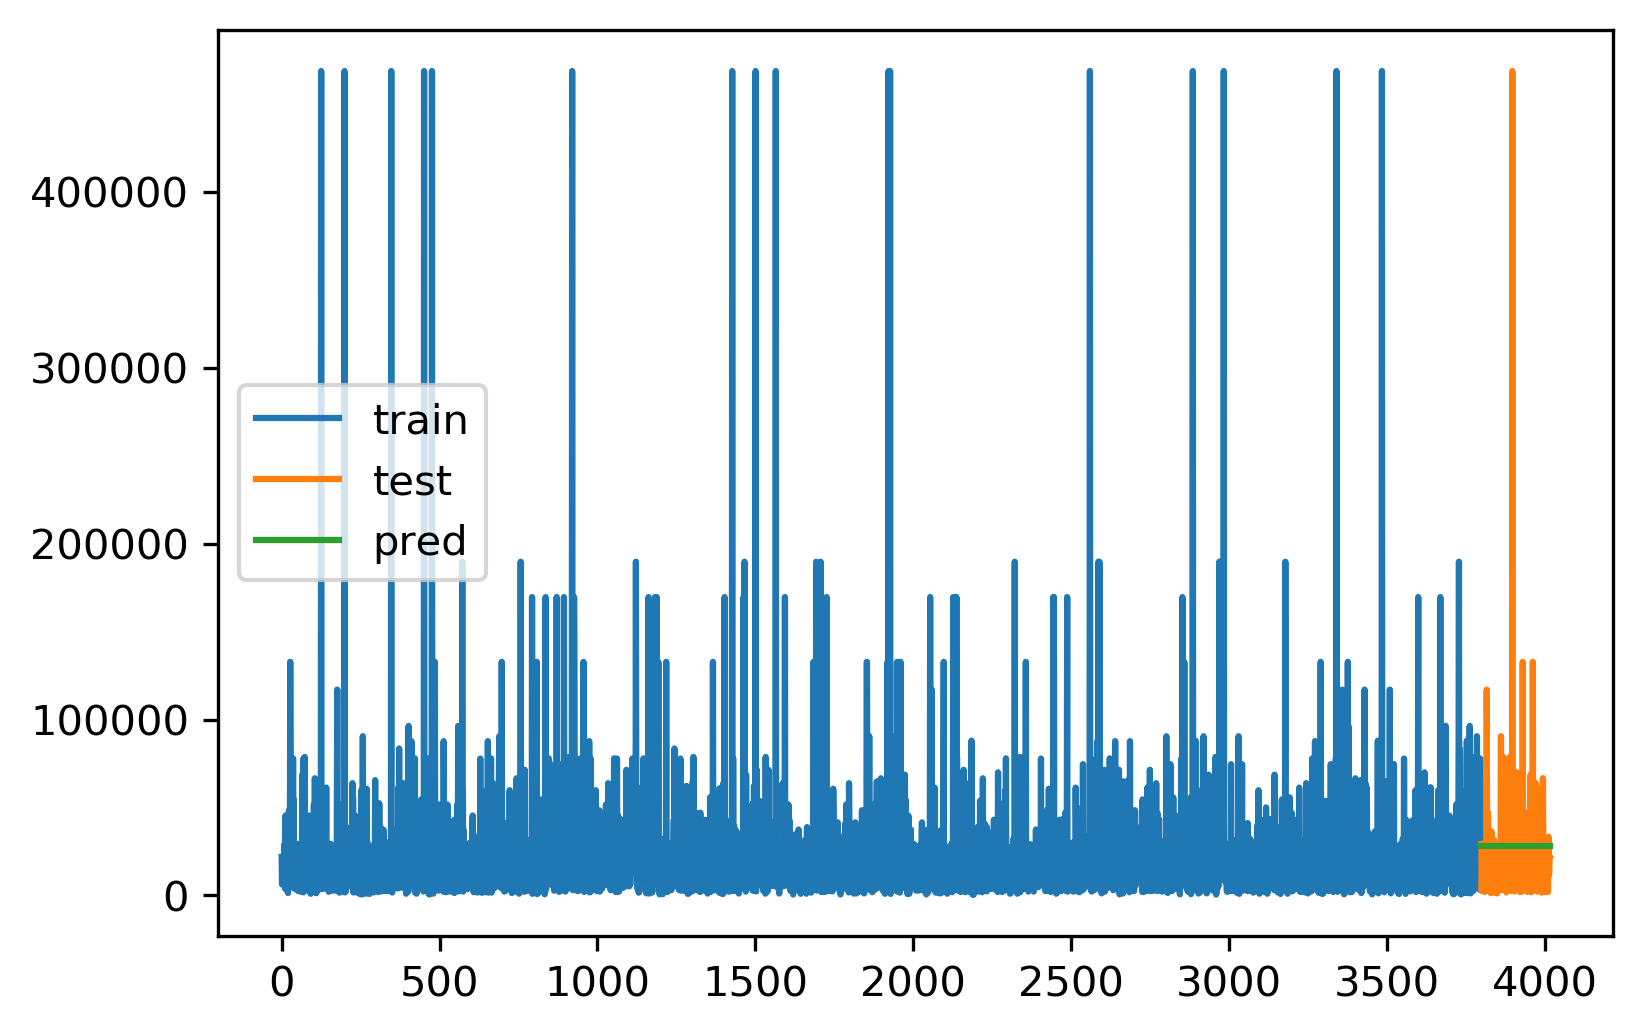

MAE 19169.167
RMSE 37224.275
MAD 16306.503
R2 0.240
MAPE 0.679
MAXAPE 15.620
TAPE 148.101


In [77]:
smoothing_level = 0.1
ses = SimpleExpSmoothing(train).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


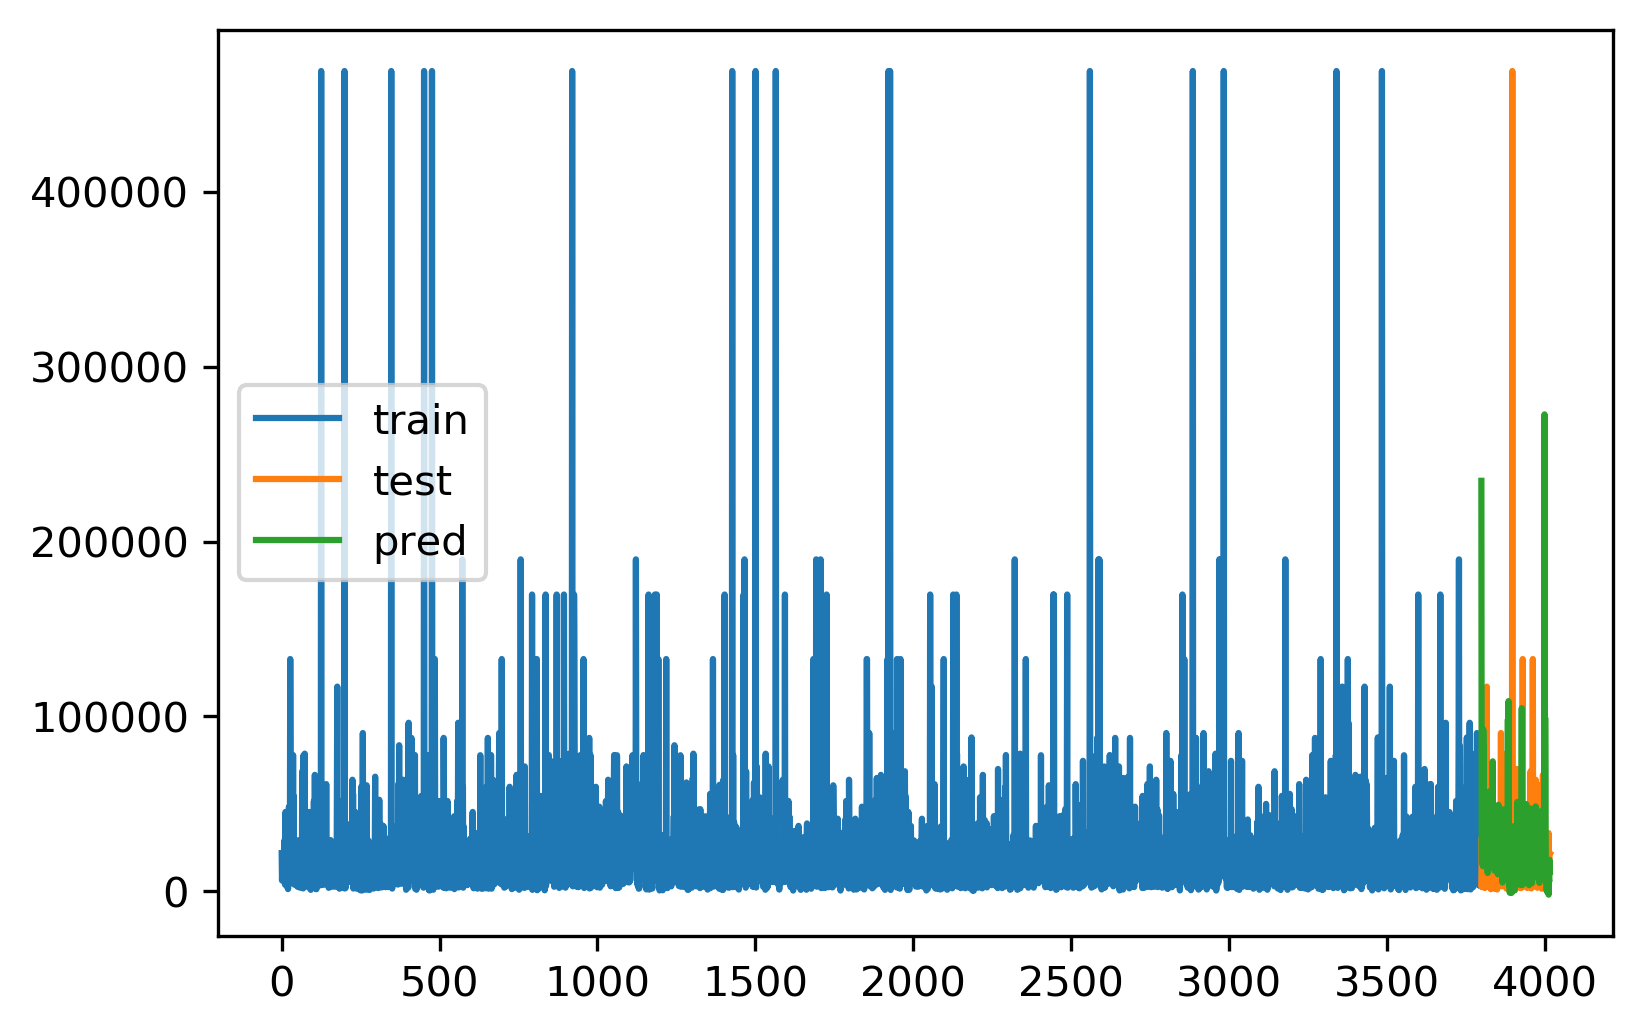

MAE 22985.537
RMSE 47249.780
MAD 13179.980
R2 -0.659
MAPE 24.879
MAXAPE 4715.065
TAPE 5423.644


In [78]:
seasonal_periods=1440

es = ExponentialSmoothing(train,  seasonal_periods=seasonal_periods, trend='add', damped=True, seasonal='add').fit()
pred = es.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts).items():
    print('%s %.3f' % (k, v))

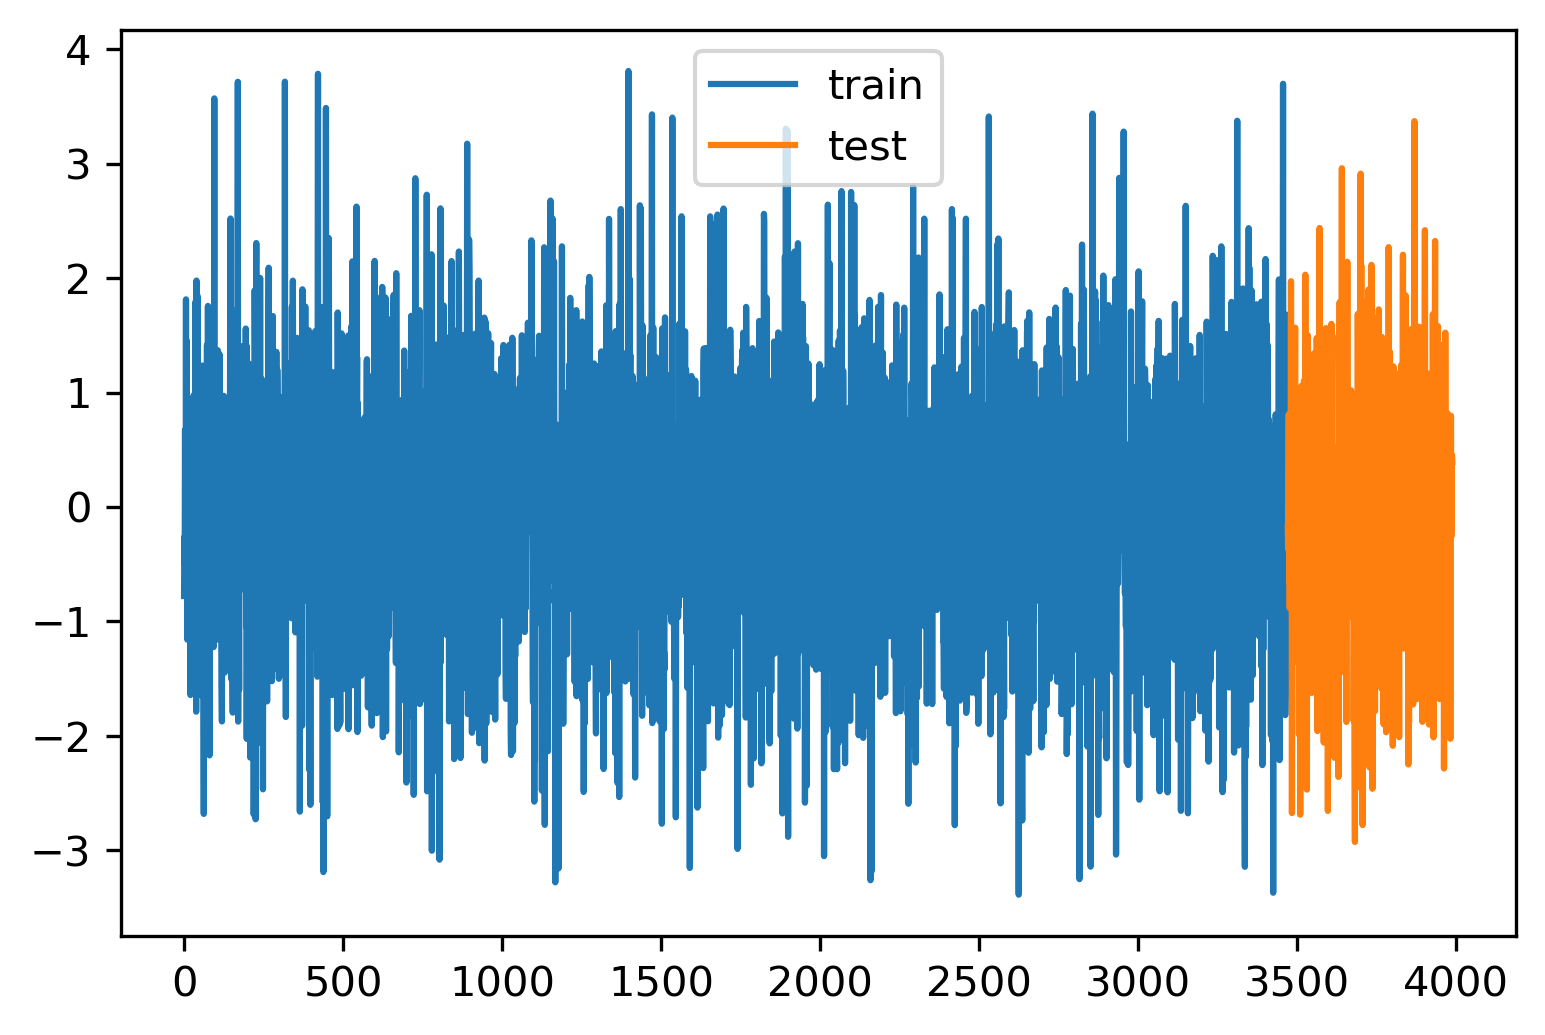

In [82]:
split_index = 3500
train, test = ts_log_mov_diff.iloc[30:split_index], ts_log_mov_diff.iloc[split_index:]

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


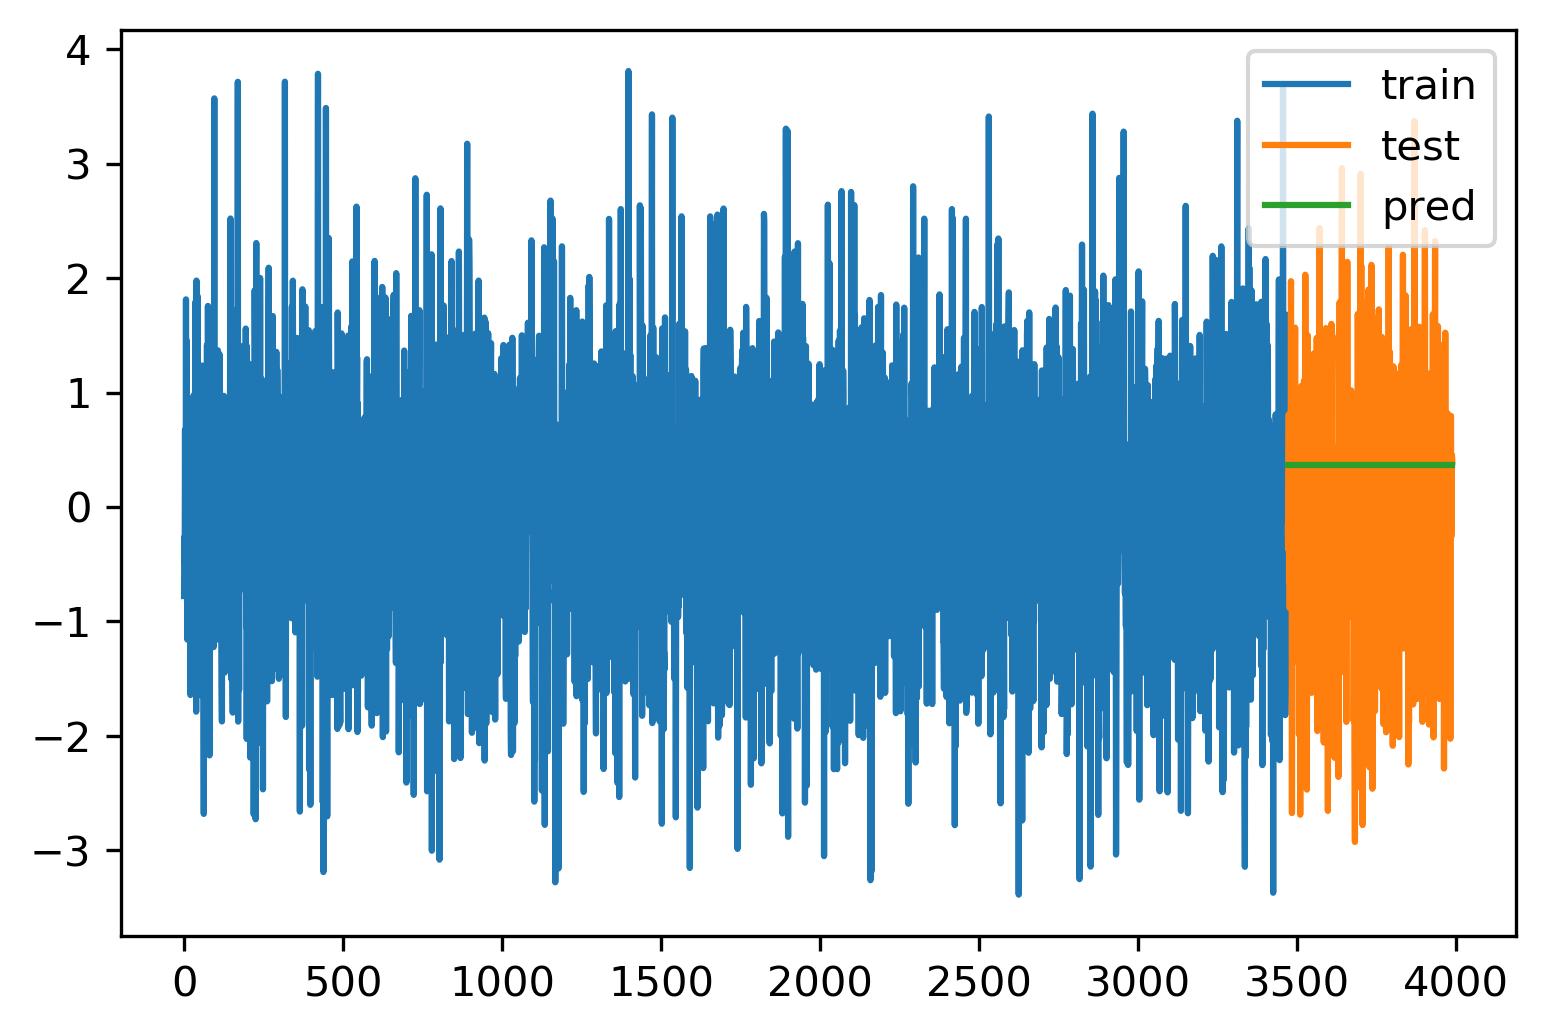

MAE 0.876
RMSE 1.128
MAD 0.697
R2 -0.118
MAPE 2.409
MAXAPE 9.051
TAPE 1247.760


In [83]:
smoothing_level = 0.1
ses = SimpleExpSmoothing(train).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


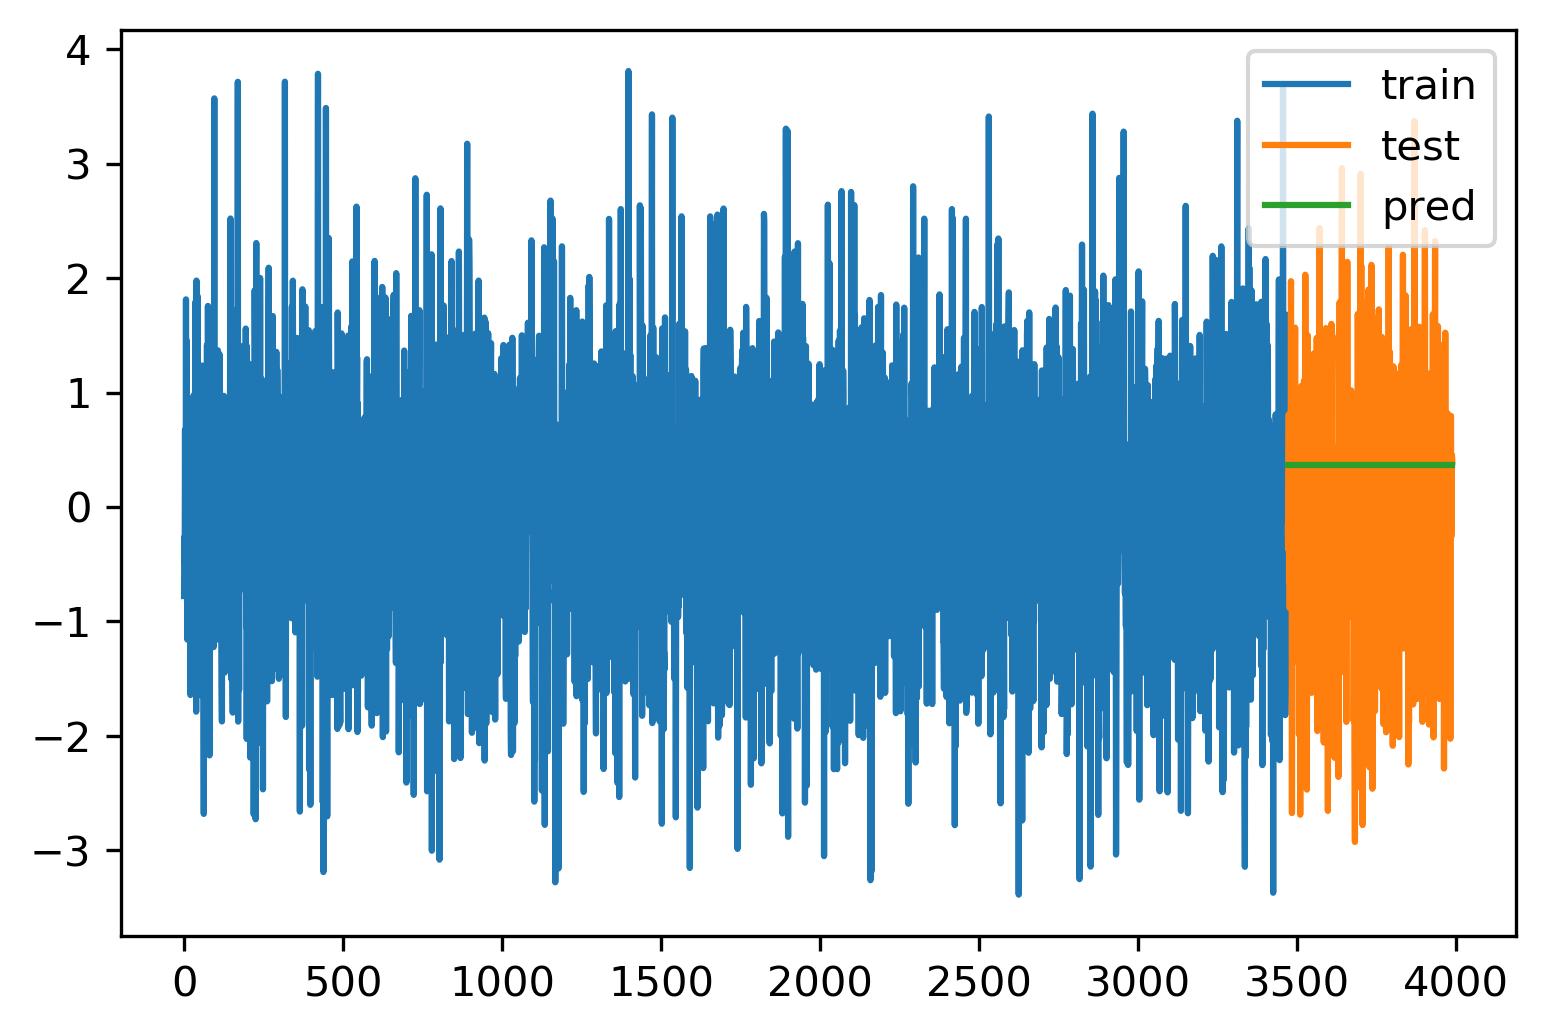

MAE 0.876
RMSE 1.128
MAD 0.697
R2 -0.118
MAPE 2.409
MAXAPE 9.051
TAPE 1247.760


In [84]:
smoothing_level=0.1
smoothing_slope=0.000

holt = Holt(train, damped = True).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)
pred = holt.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


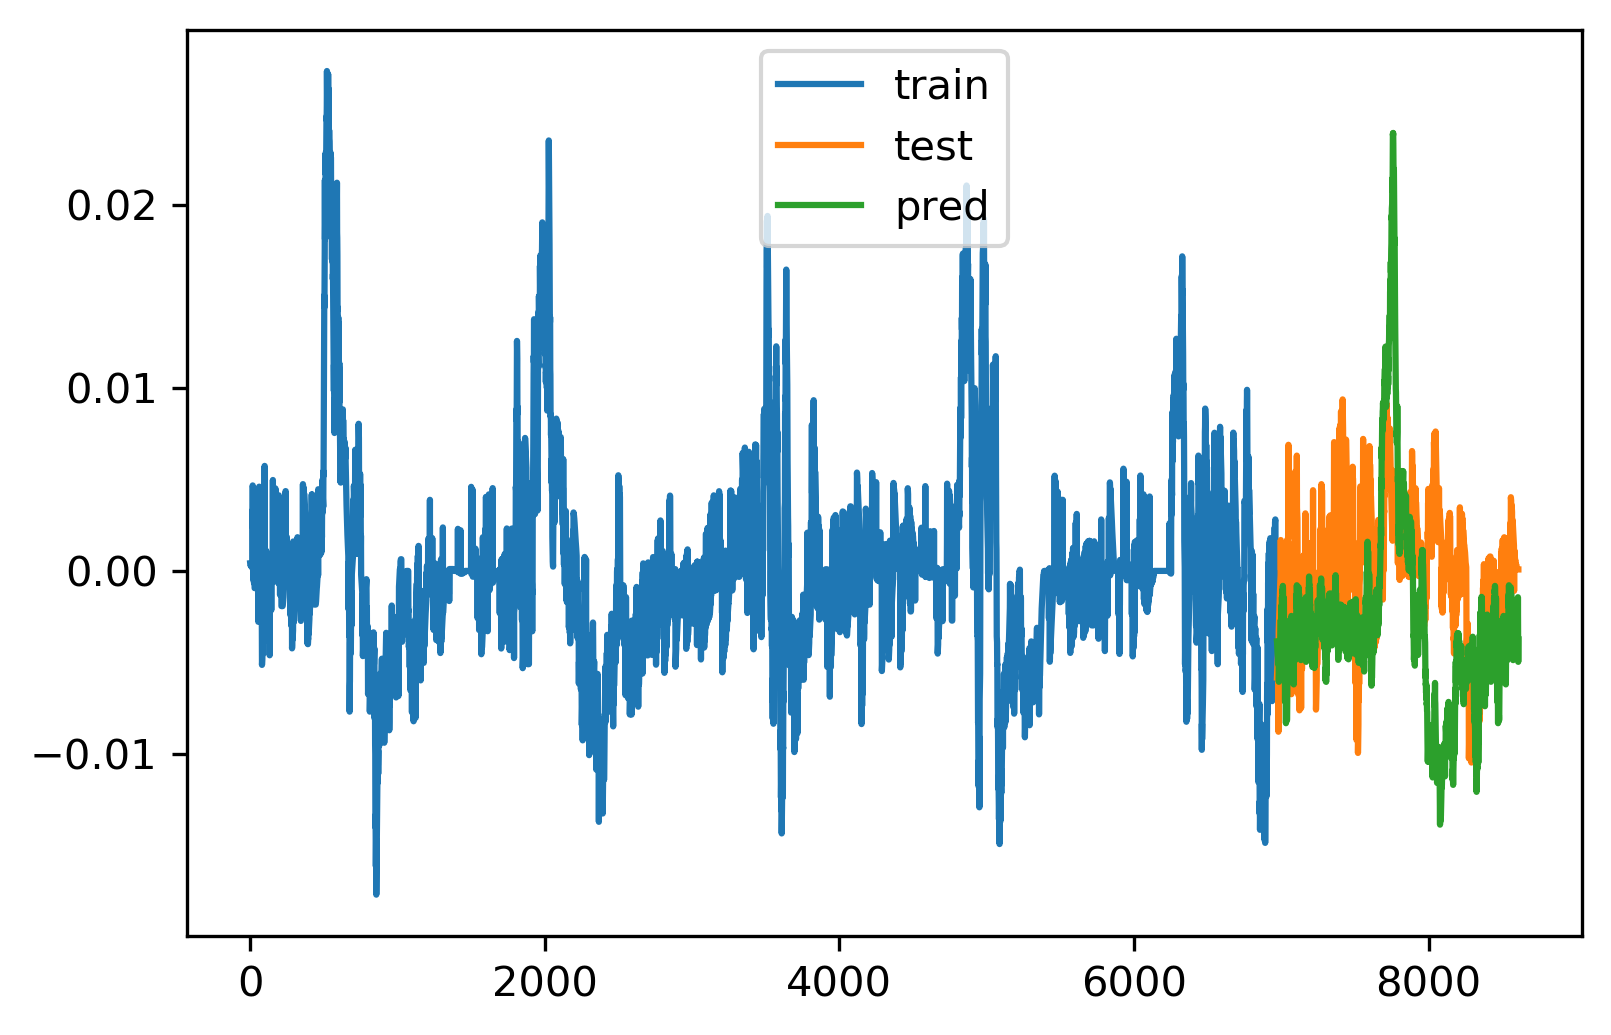

MAE 0.005
RMSE 0.006
MAD 0.004
R2 1.000
MAPE 1.513
MAXAPE 342.306
TAPE 2481.600


In [71]:
seasonal_periods=1440

es = ExponentialSmoothing(train, seasonal_periods=seasonal_periods, seasonal='add').fit()
pred = es.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts).items():
    print('%s %.3f' % (k, v))

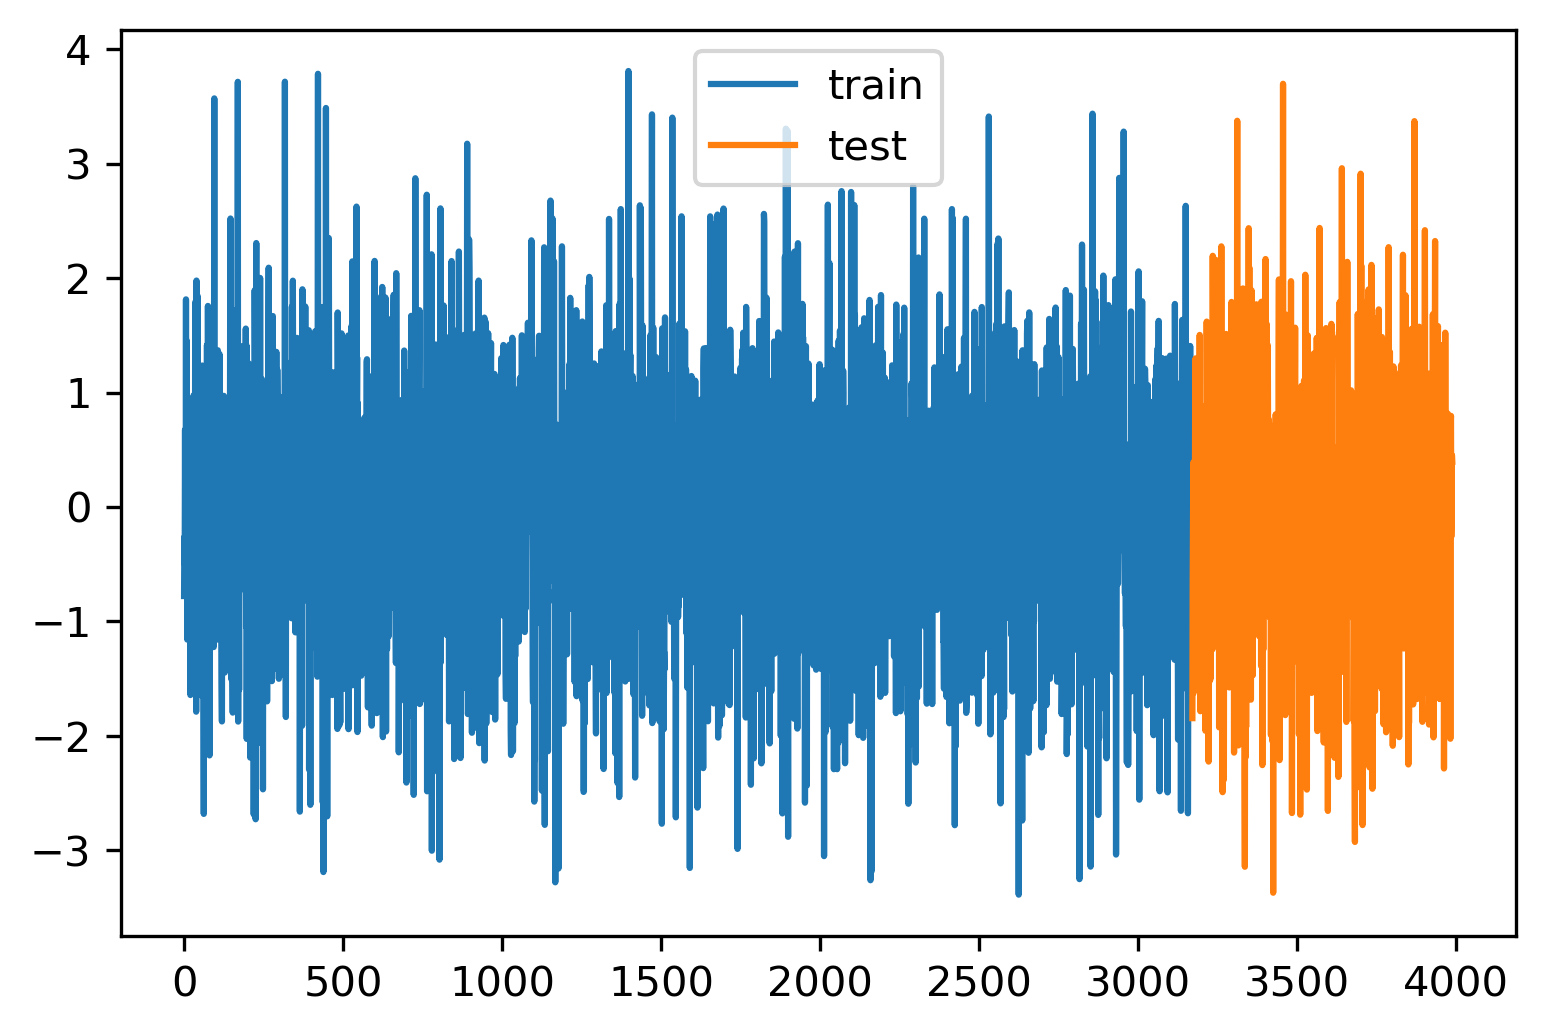

In [85]:
split_index = 3200
train, test = ts_log_mov_diff.iloc[30:split_index], ts_log_mov_diff.iloc[split_index:]

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.legend()
plt.show()

# Merge the datasets

In [51]:
df=pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/datatraining.txt')
df['date'] =  pd.to_datetime(df['date'], format = '%Y-%m-%d %H:%M:%S')
df.sort_values('date', inplace = True)
df.reset_index(inplace = True, drop = True)


test = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/datatest.txt')
test['date'] =  pd.to_datetime(test['date'], format = '%Y-%m-%d %H:%M:%S')
test.sort_values('date', inplace = True)
test.reset_index(inplace = True, drop = True)

test2 = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/datatest2.txt')
test2['date'] =  pd.to_datetime(test2['date'], format = '%Y-%m-%d %H:%M:%S')
test2.sort_values('date', inplace = True)
test2.reset_index(inplace = True, drop = True)

print(df.head())
print(df.tail()) 



print(test.head())# non me ne faccio praticamente un czzo del test set, ci son cinque ore di buco tra il training ed i test 
print(test.tail())

print(test2.head()) 
print(test2.tail())

                 date  Temperature  Humidity  Light     CO2  HumidityRatio  \
0 2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
1 2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
2 2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
3 2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
4 2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
0          1  
1          1  
2          1  
3          1  
4          1  
                    date  Temperature  Humidity  Light         CO2  \
8138 2015-02-10 09:29:00        21.05   36.0975  433.0  787.250000   
8139 2015-02-10 09:29:59        21.05   35.9950  433.0  789.500000   
8140 2015-02-10 09:30:59        21.10   36.0950  433.0  798.500000   
8141 2015-02-10 09:32:00        21.10   36.2600  433.0  820.333333   
8142 2015-02-10 09:33:00        21.10   36.2000  447.0  821.000000   

      HumidityRatio 

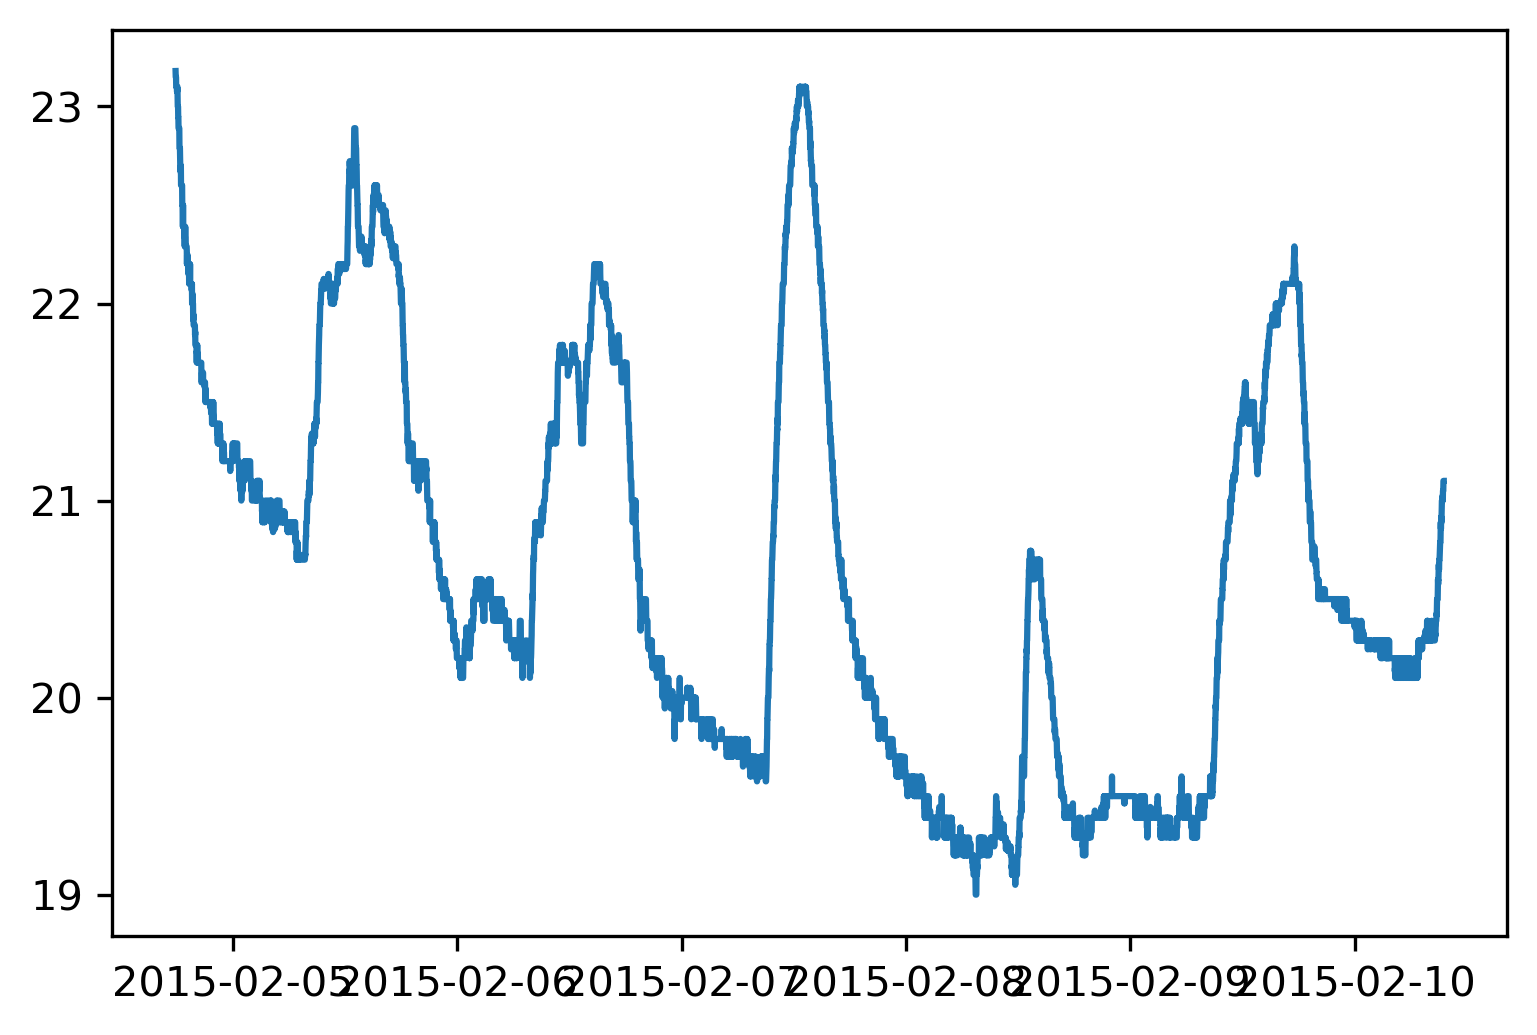

2015-02-04 17:51:00    23.18
2015-02-04 17:52:00    23.15
2015-02-04 17:53:00    23.15
2015-02-04 17:54:00    23.15
2015-02-04 17:55:00    23.10
                       ...  
2015-02-10 09:29:00    21.05
2015-02-10 09:30:00    21.05
2015-02-10 09:31:00    21.10
2015-02-10 09:32:00    21.10
2015-02-10 09:33:00    21.10
Freq: T, Length: 8143, dtype: float64

In [52]:
#print(len(df))
#print(( 24*60-17*60 -51)+ 60 *24*5+ (9*60+33)) #ho un dato per ogni minuto, posso creare un indice minuto per minuto
index = pd.date_range(start=df['date'][0], end=df['date'][len(df)-1], freq='min')
ts1 = df['Temperature']


ts1 = pd.Series(ts1.values, index)
plt.plot(ts1)
plt.show()
ts1

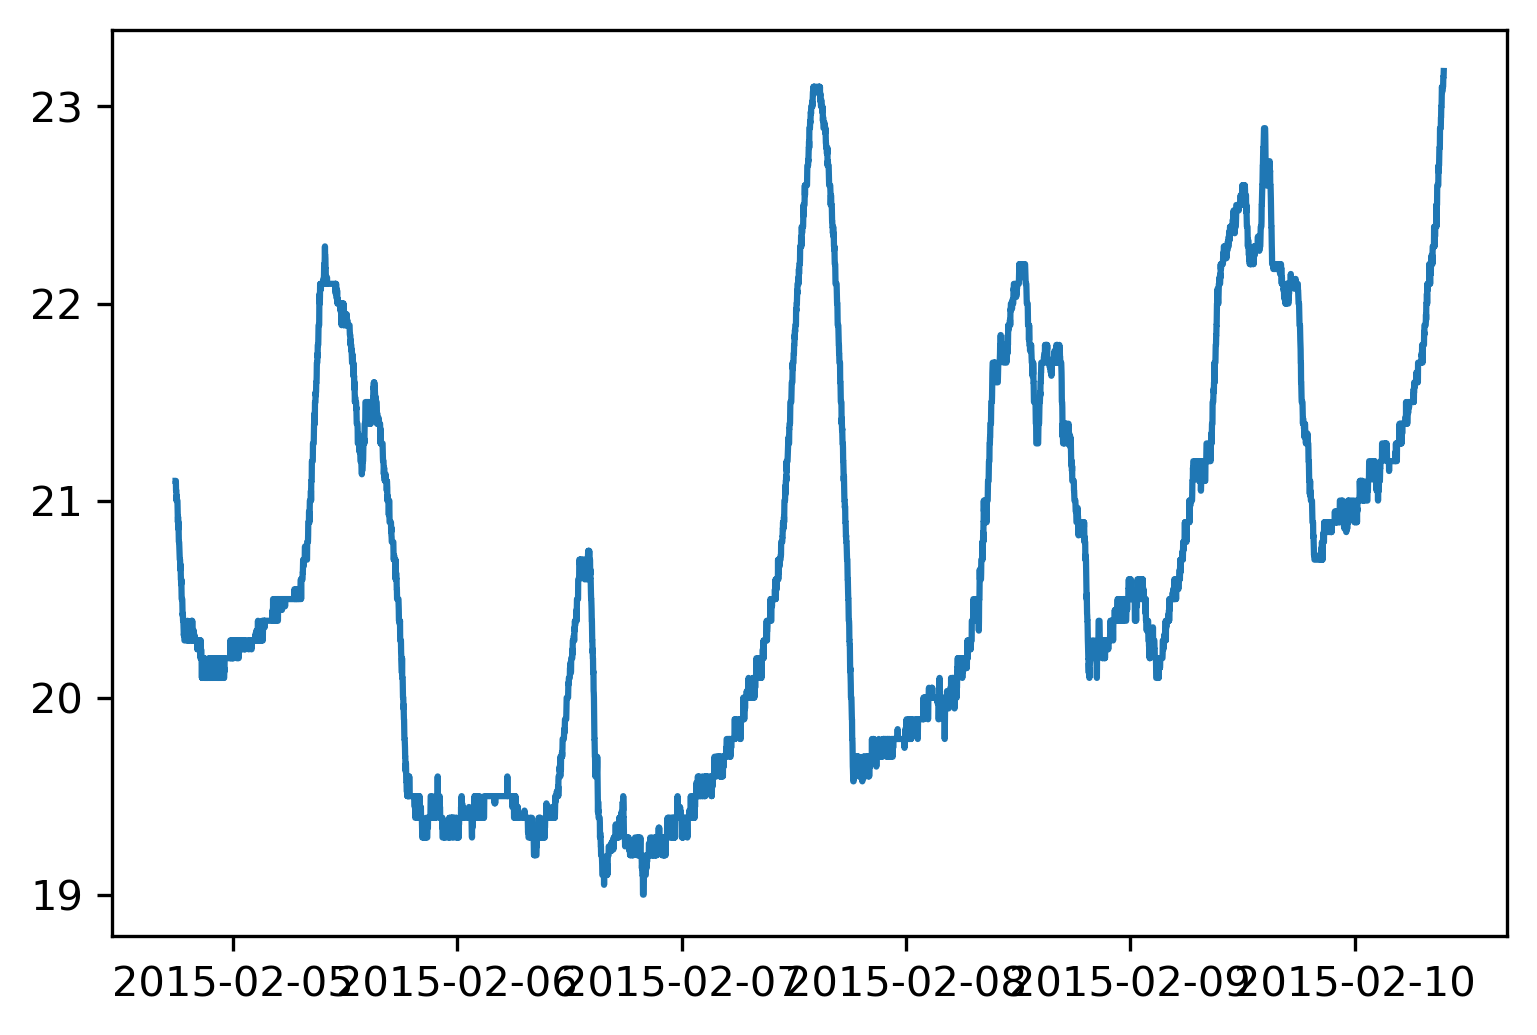

2015-02-04 17:51:00    23.18
2015-02-04 17:52:00    23.15
2015-02-04 17:53:00    23.15
2015-02-04 17:54:00    23.15
2015-02-04 17:55:00    23.10
                       ...  
2015-02-10 09:29:00    21.05
2015-02-10 09:30:00    21.05
2015-02-10 09:31:00    21.10
2015-02-10 09:32:00    21.10
2015-02-10 09:33:00    21.10
Freq: T, Length: 8143, dtype: float64

In [53]:
#print(len(df))
#print(( 24*60-17*60 -51)+ 60 *24*5+ (9*60+33)) #ho un dato per ogni minuto, posso creare un indice minuto per minuto
index = pd.date_range(start=df['date'][0], end=df['date'][len(df)-1], freq='min')
ts1r = reversed(df['Temperature'].values)


ts1r = pd.Series(ts1r, index)
plt.plot(ts1r)
plt.show()
ts1

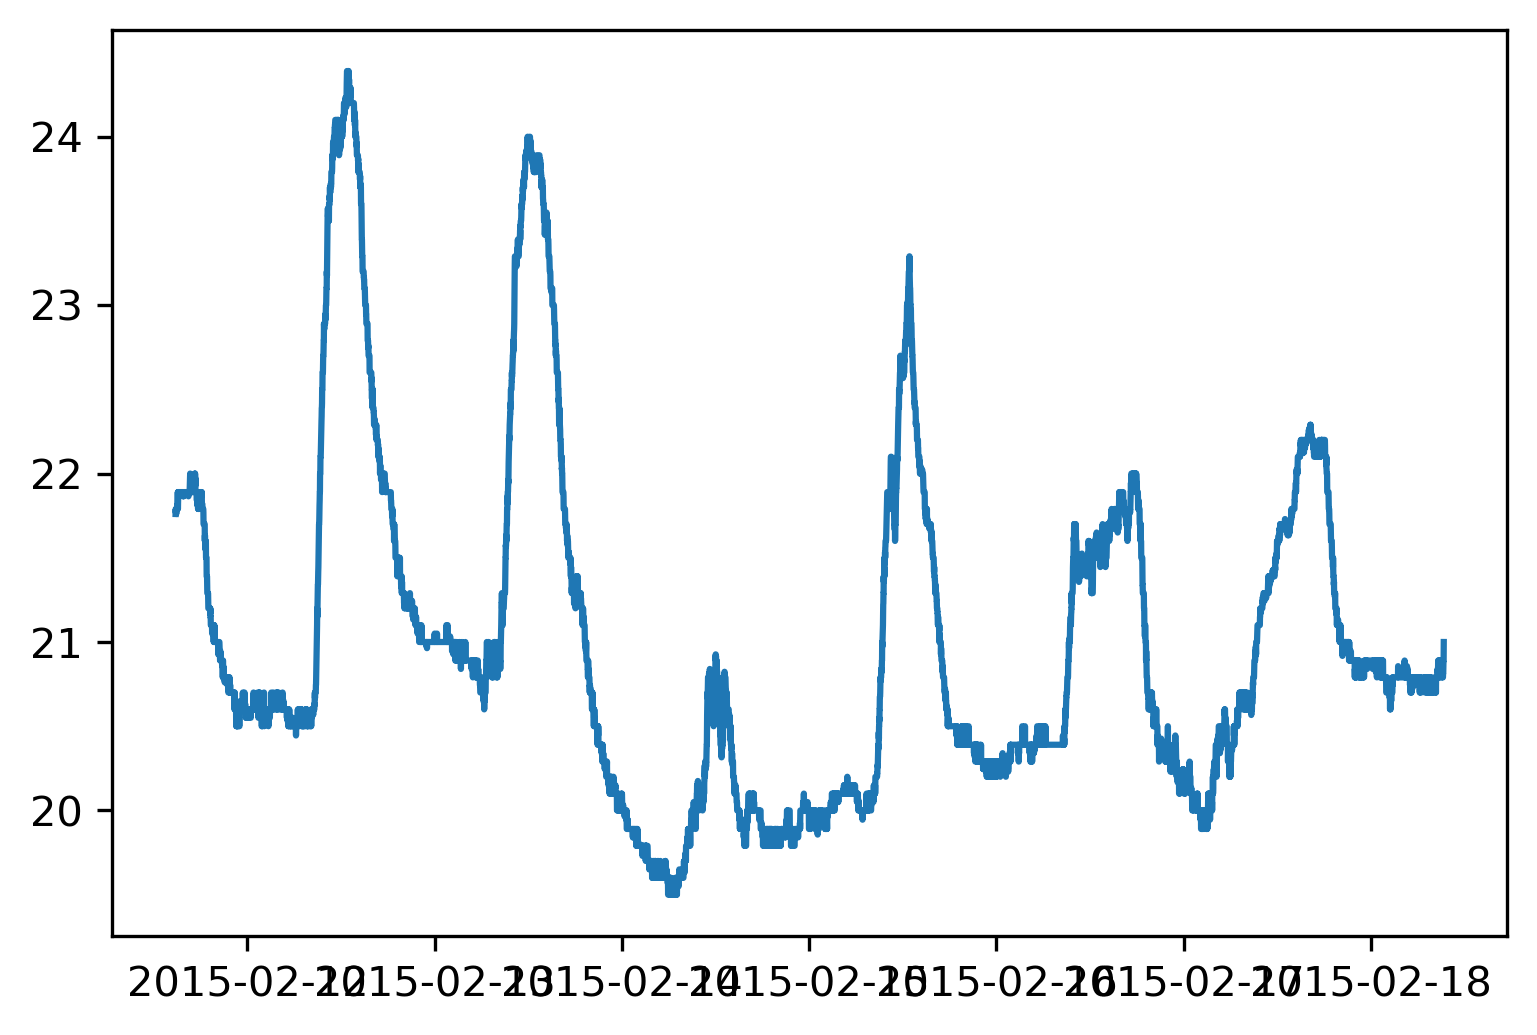

2015-02-11 14:48:00    21.7600
2015-02-11 14:49:00    21.7900
2015-02-11 14:50:00    21.7675
2015-02-11 14:51:00    21.7675
2015-02-11 14:52:00    21.7900
                        ...   
2015-02-18 09:15:00    20.8150
2015-02-18 09:16:00    20.8650
2015-02-18 09:17:00    20.8900
2015-02-18 09:18:00    20.8900
2015-02-18 09:19:00    21.0000
Freq: T, Length: 9752, dtype: float64

In [54]:
#print(len(test2))
#print(( 24*60-14*60 -48)+ 60 *24*6+ (9*60+19)) #ho un dato per ogni minuto, posso creare un indice minuto per minuto
index = pd.date_range(start=test2['date'][0], end=test2['date'][len(test2)-1], freq='min')
index
ts2 = test2['Temperature']


ts2 = pd.Series(ts2.values, index)
plt.plot(ts2)
plt.show()
ts2

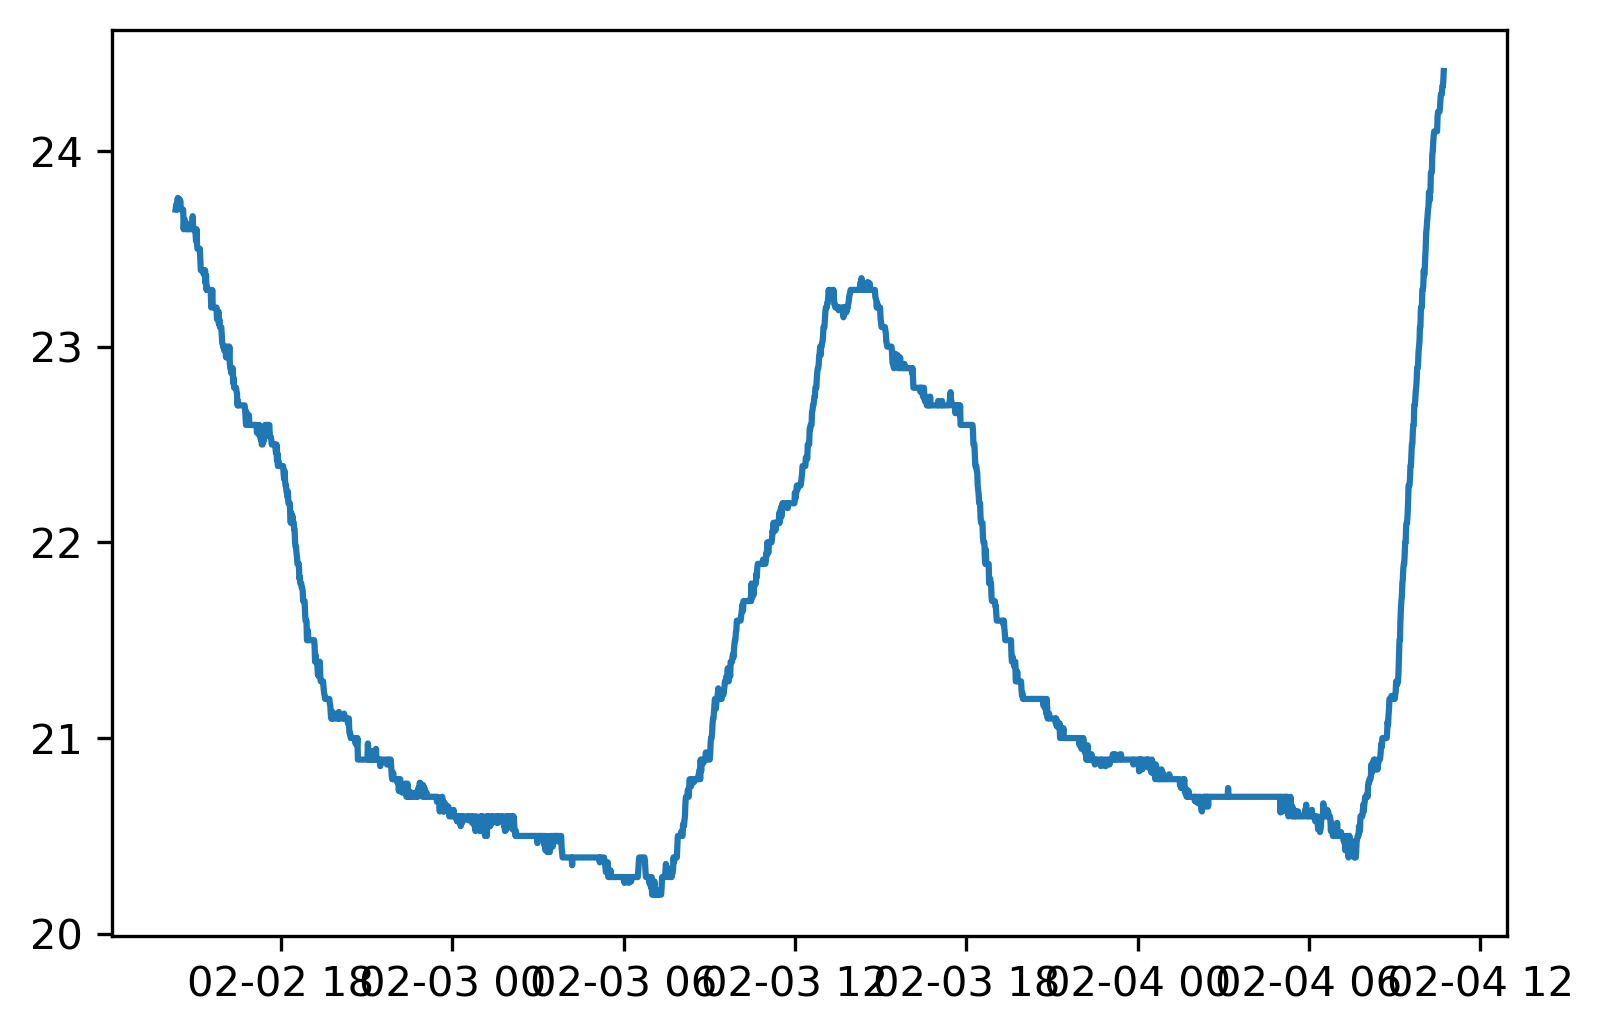

2015-02-02 14:19:00    23.700000
2015-02-02 14:20:00    23.718000
2015-02-02 14:21:00    23.730000
2015-02-02 14:22:00    23.722500
2015-02-02 14:23:00    23.754000
                         ...    
2015-02-04 10:39:00    24.290000
2015-02-04 10:40:00    24.330000
2015-02-04 10:41:00    24.330000
2015-02-04 10:42:00    24.356667
2015-02-04 10:43:00    24.408333
Freq: T, Length: 2665, dtype: float64

In [55]:

index = pd.date_range(start=test['date'][0], end=test['date'][len(test)-1], freq='min')
index
ts0= test['Temperature']


ts0 = pd.Series(ts0.values, index)
plt.plot(ts0)
plt.show()
ts0

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


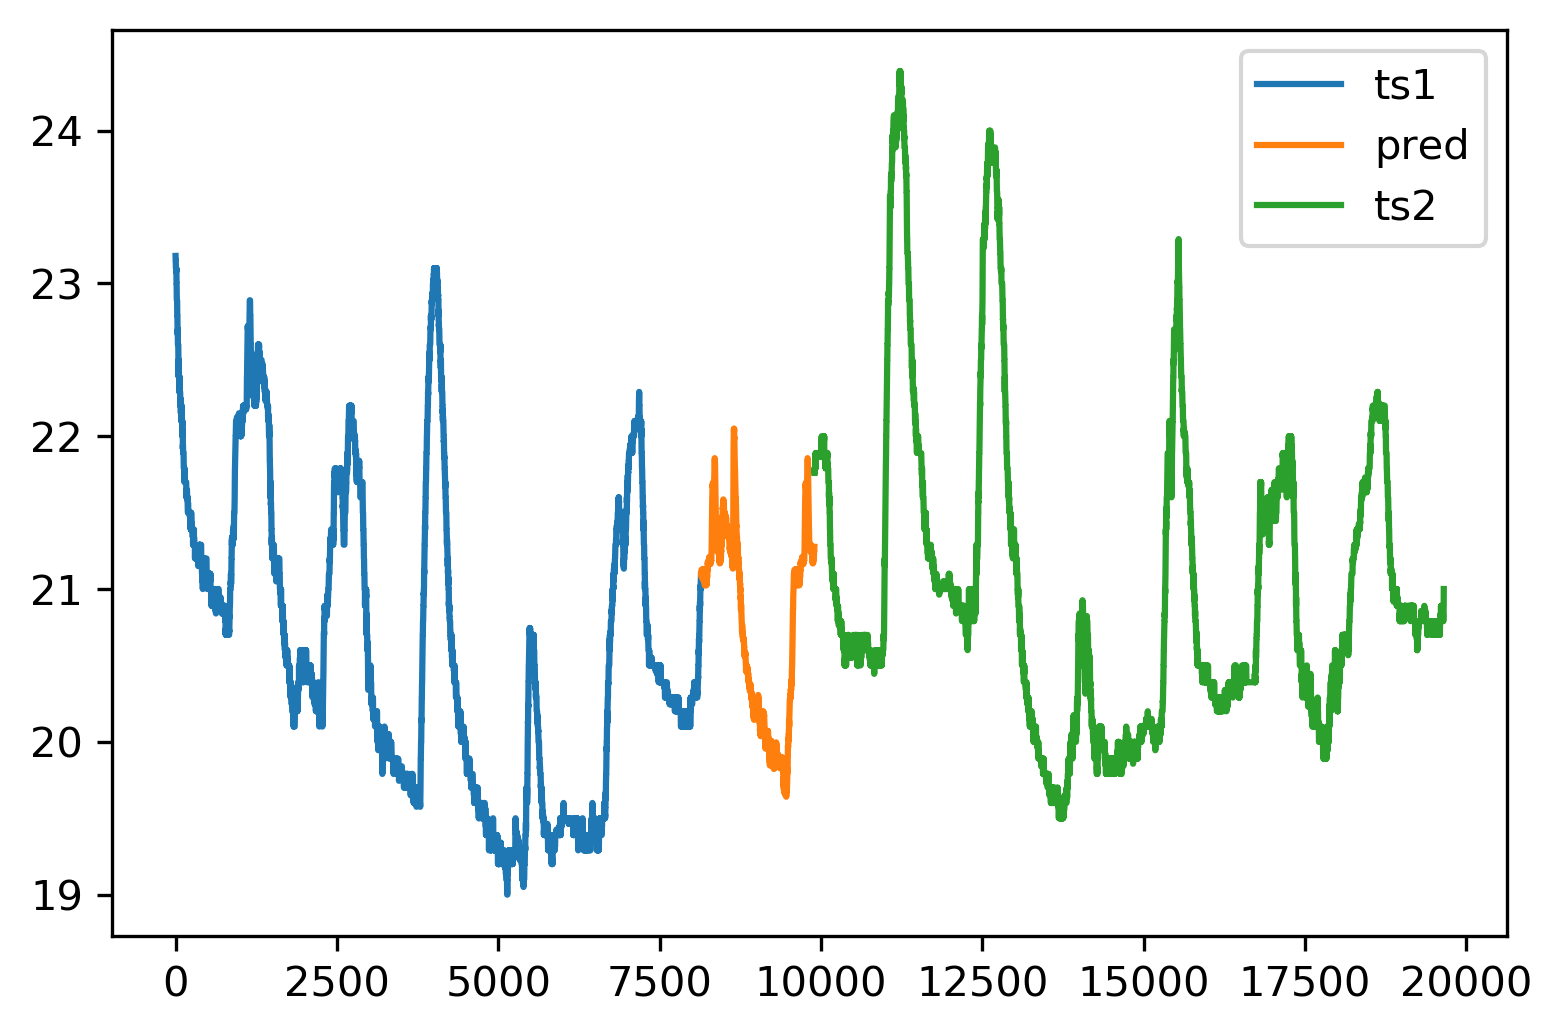

In [56]:
seasonal_periods=1440

es = ExponentialSmoothing(ts1,  seasonal_periods=seasonal_periods,seasonal='add').fit()
pred = es.predict(start=ts1.index[-1], end=ts2.index[0])

plt.plot(range(len(ts1)), ts1, label='ts1')
plt.plot(range(len(ts1), len(ts1)+len(pred)), pred, label='pred')
plt.plot(range(len(ts1)+len(pred), len(ts1)+len(pred)+len(ts2) ), ts2, label='ts2')
plt.legend()
plt.show()
pred1 = pred.values

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


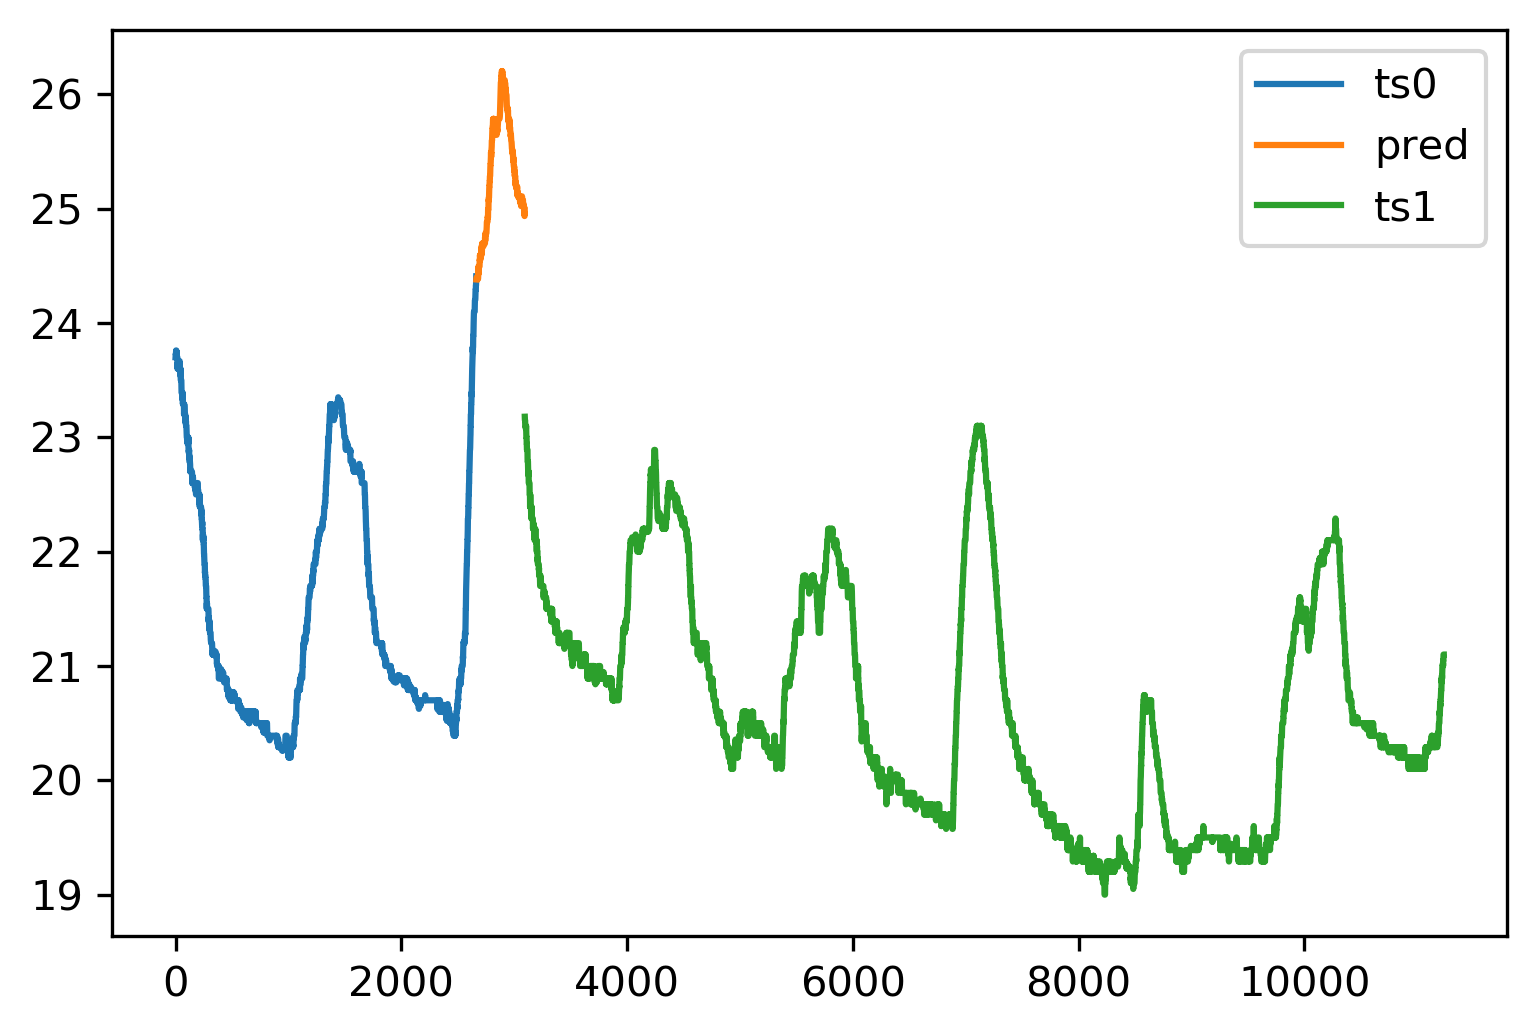

In [57]:
seasonal_periods=1440

es = ExponentialSmoothing(ts0,  seasonal_periods=seasonal_periods, seasonal='add').fit()
pred0 = es.predict(start=ts0.index[-1], end=ts1.index[0])

plt.plot(range(len(ts0)), ts0, label='ts0')
plt.plot(range(len(ts0), len(ts0)+len(pred0)), pred0, label='pred')
plt.plot(range(len(ts0)+len(pred0), len(ts0)+len(pred0)+len(ts1) ), ts1, label='ts1')
plt.legend()
plt.show()
pred00 = pred0.values

In [58]:
print( ts1.index[-1])
print(ts1.index[0] - ts0.index[-1])

2015-02-10 09:33:00
0 days 07:08:00


2015-02-10 16:41:00

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


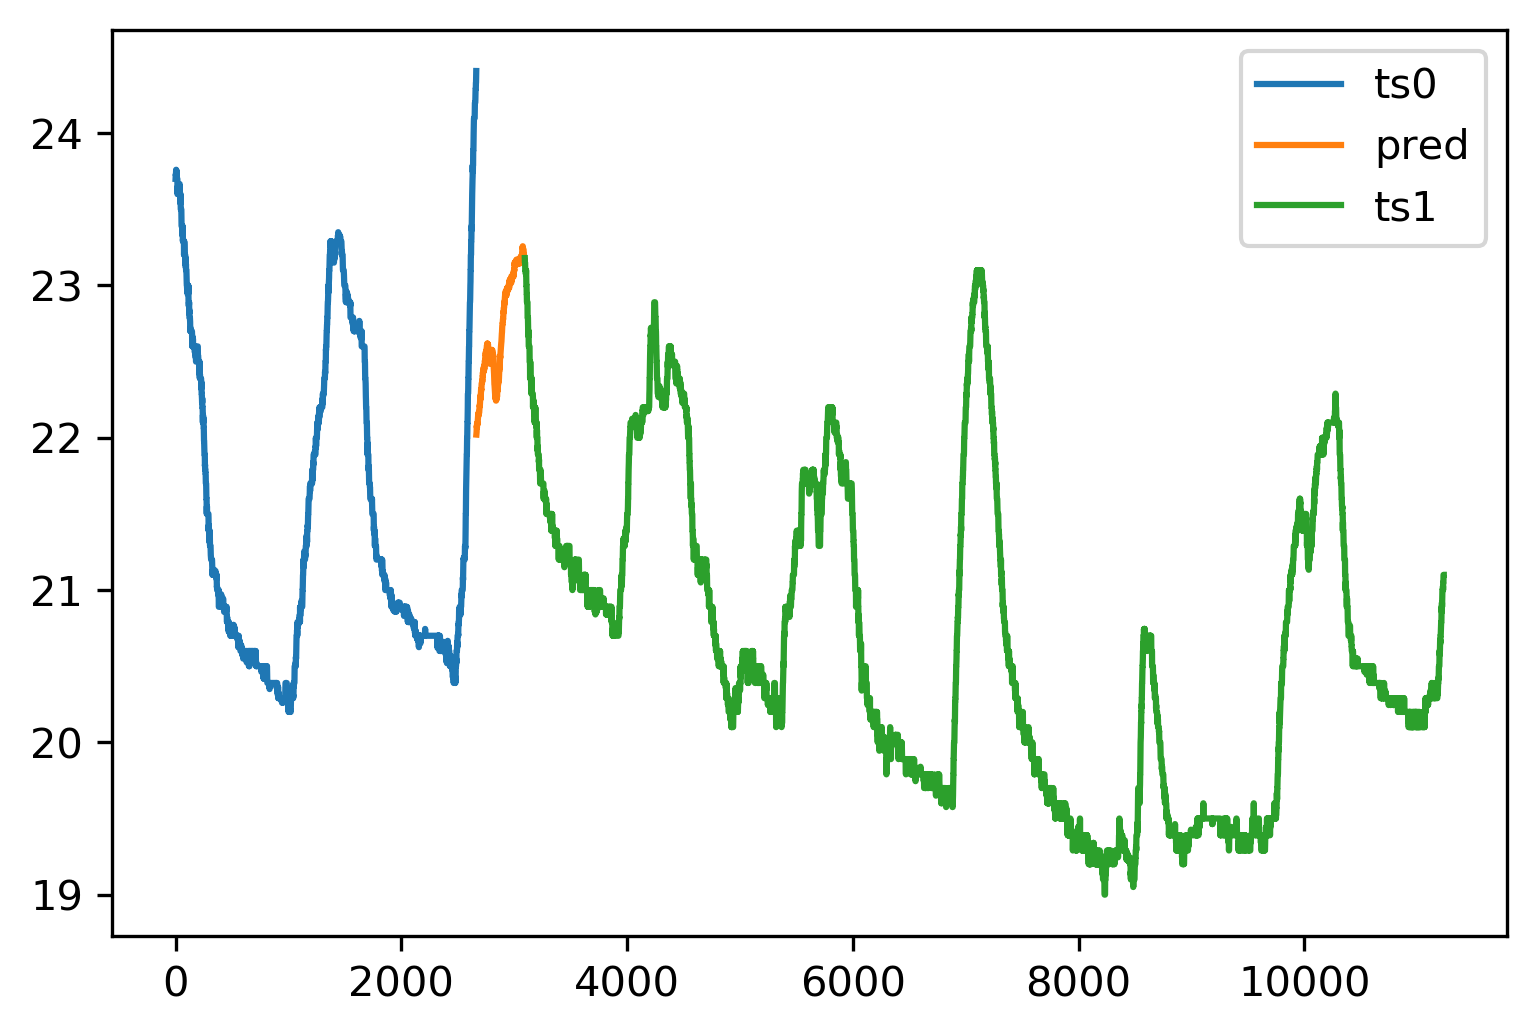

In [59]:
seasonal_periods=1440

es = ExponentialSmoothing(ts1r,  seasonal_periods=seasonal_periods, seasonal='add').fit()
pred0r = es.predict(start=ts1r.index[-1], end='2015-02-10 16:41:00')

pred0 = pred0r.values[::-1]

plt.plot(range(len(ts0)), ts0, label='ts0')
plt.plot(range(len(ts0), len(ts0)+len(pred0)), pred0, label='pred')
plt.plot(range(len(ts0)+len(pred0), len(ts0)+len(pred0)+len(ts1) ), ts1, label='ts1')
plt.legend()
plt.show()

In [60]:
print(len(pred00), len(pred0))

429 429


In [61]:
pred000 = []
l = len(pred0)
for i in range(l):
    pred000.append( (pred0[i] * i + pred00[i] * (l -i) )/ l)

len(pred000)
    

429

In [62]:
pred0000 = [(pred0[i] * i + pred00[i] * (len(pred00) -i) )/ len(pred00) for i in range(len(pred00))]

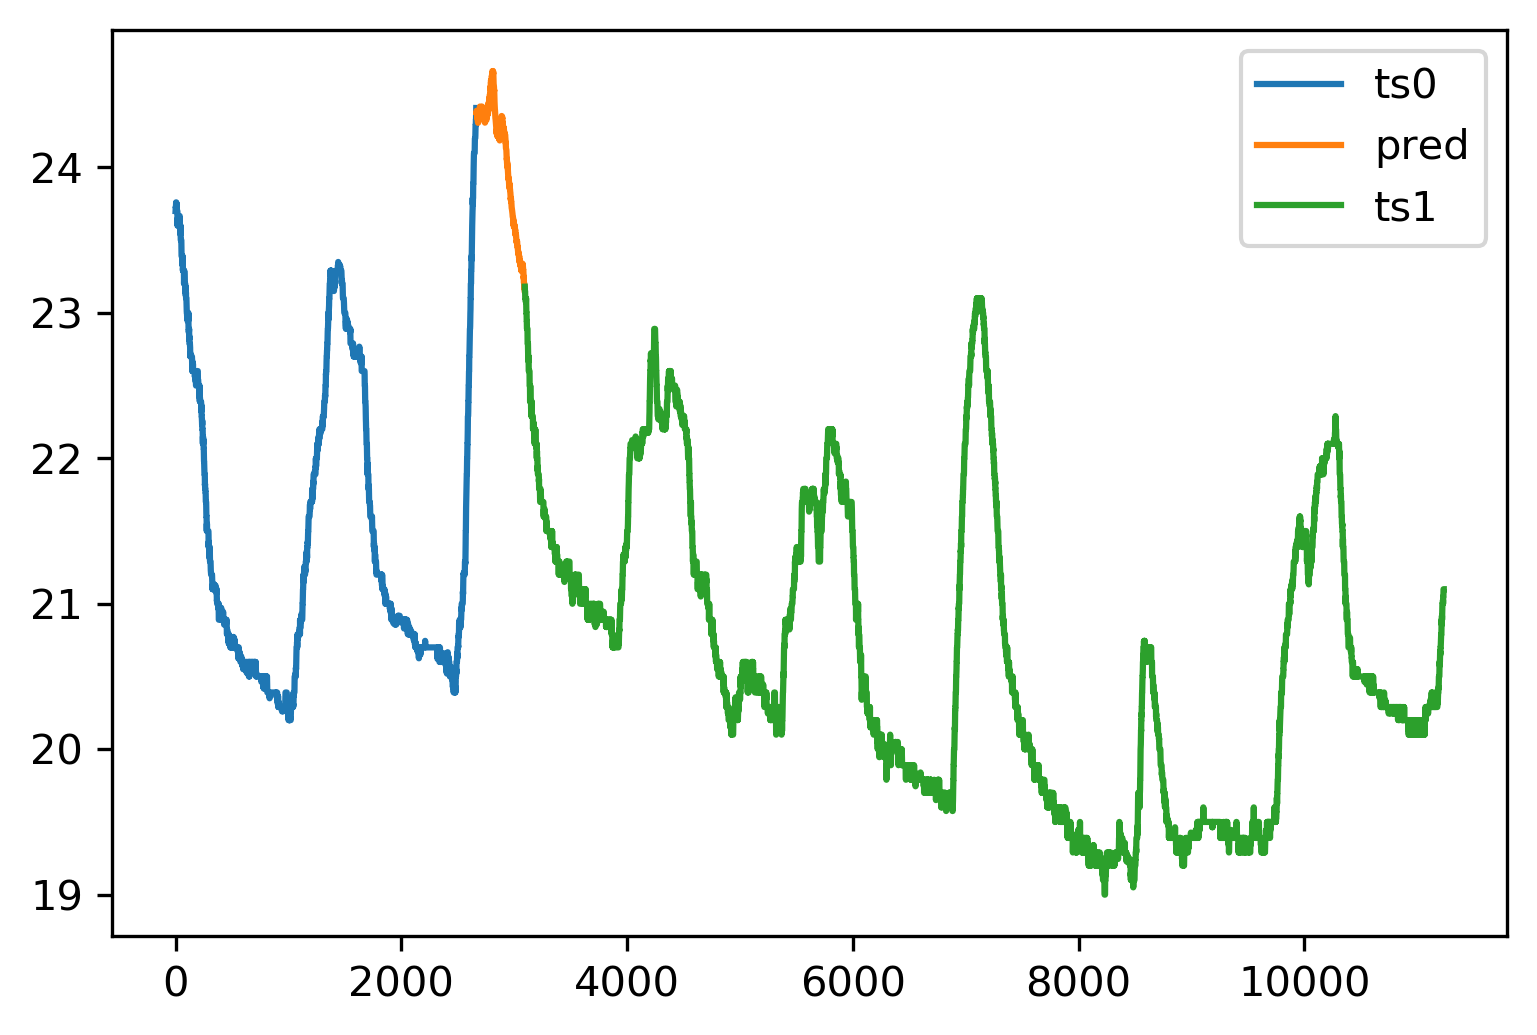

In [63]:
plt.plot(range(len(ts0)), ts0, label='ts0')
plt.plot(range(len(ts0), len(ts0)+len(pred000)), pred0000, label='pred')
plt.plot(range(len(ts0)+len(pred0), len(ts0)+len(pred000)+len(ts1) ), ts1, label='ts1')
plt.legend()
plt.show()

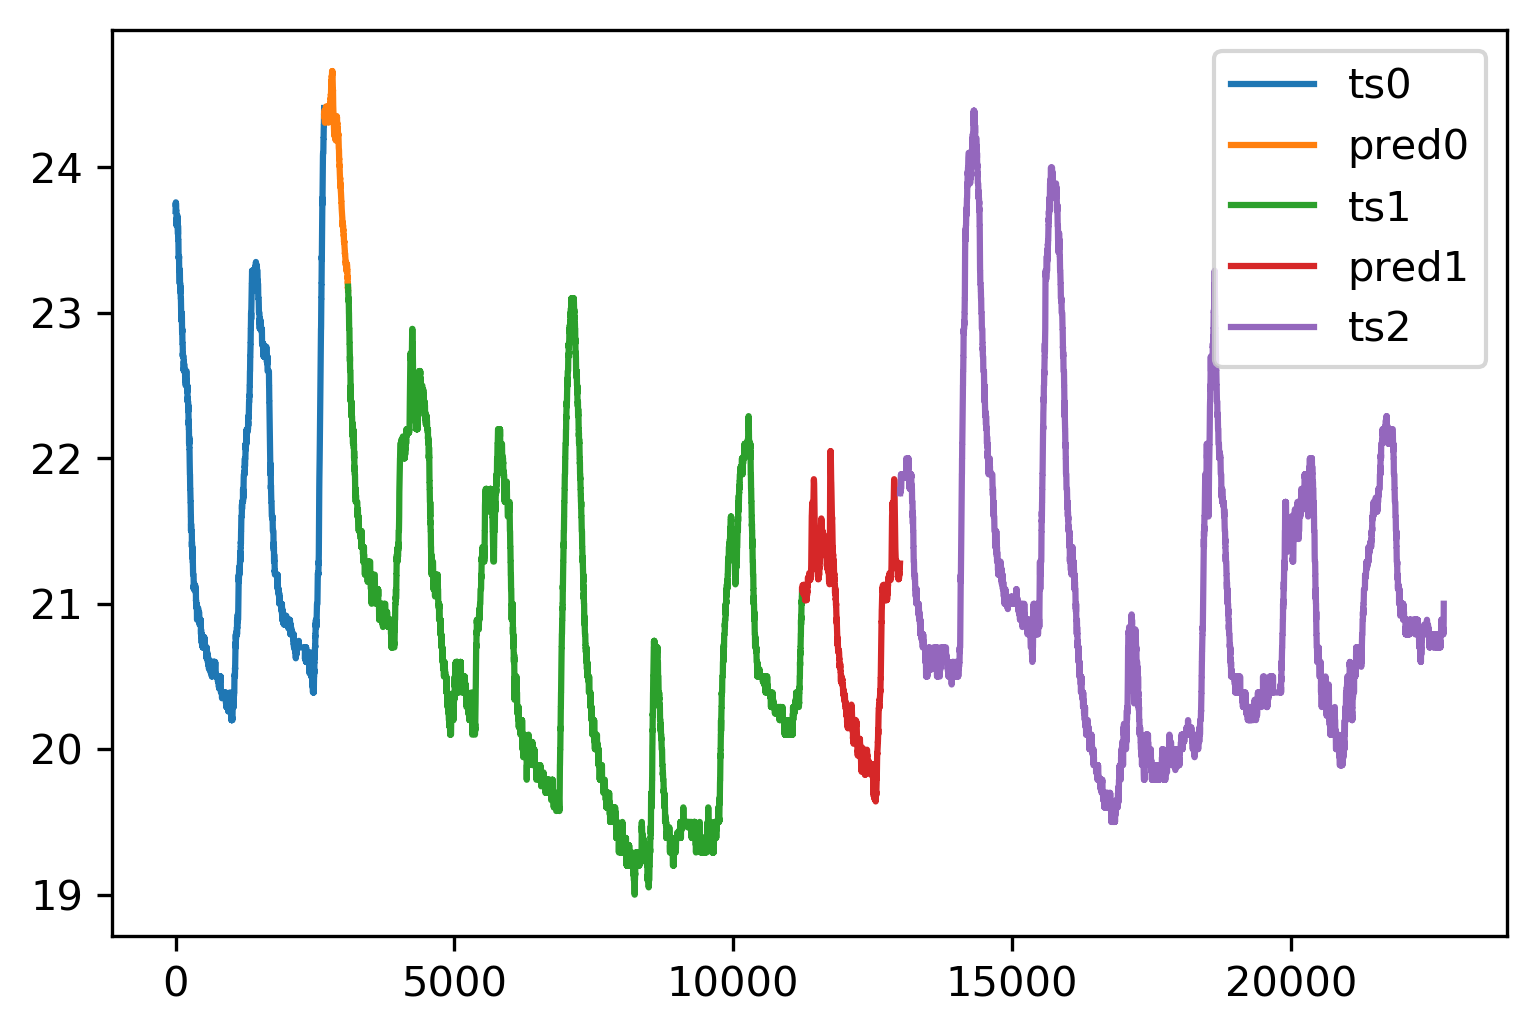

In [64]:
plt.plot(range(len(ts0)), ts0, label='ts0')
plt.plot(range(len(ts0), len(ts0)+len(pred000)), pred000, label='pred0')
plt.plot(range(len(ts0)+len(pred0), len(ts0)+len(pred000)+len(ts1) ), ts1, label='ts1')
plt.plot(range(len(ts0)+len(pred000)+len(ts1), len(ts0)+len(pred000)+len(ts1)+len(pred1)), pred1, label='pred1')
plt.plot(range(len(ts0)+len(pred000)+len(ts1)+len(pred1),len(ts0)+len(pred000)+len(ts1)+len(pred1)+len(ts2) ), ts2, label='ts2')
plt.legend(loc=1)
plt.show()

In [65]:
index = pd.date_range(start=test['date'][0], end=test2['date'][len(test2)-1], freq='min')

ts = np.concatenate((ts0, pred000[1:-1], ts1, pred1[1:-1], ts2))
ts = pd.Series(ts, index)

In [66]:
ts

2015-02-02 14:19:00    23.7000
2015-02-02 14:20:00    23.7180
2015-02-02 14:21:00    23.7300
2015-02-02 14:22:00    23.7225
2015-02-02 14:23:00    23.7540
                        ...   
2015-02-18 09:15:00    20.8150
2015-02-18 09:16:00    20.8650
2015-02-18 09:17:00    20.8900
2015-02-18 09:18:00    20.8900
2015-02-18 09:19:00    21.0000
Freq: T, Length: 22741, dtype: float64

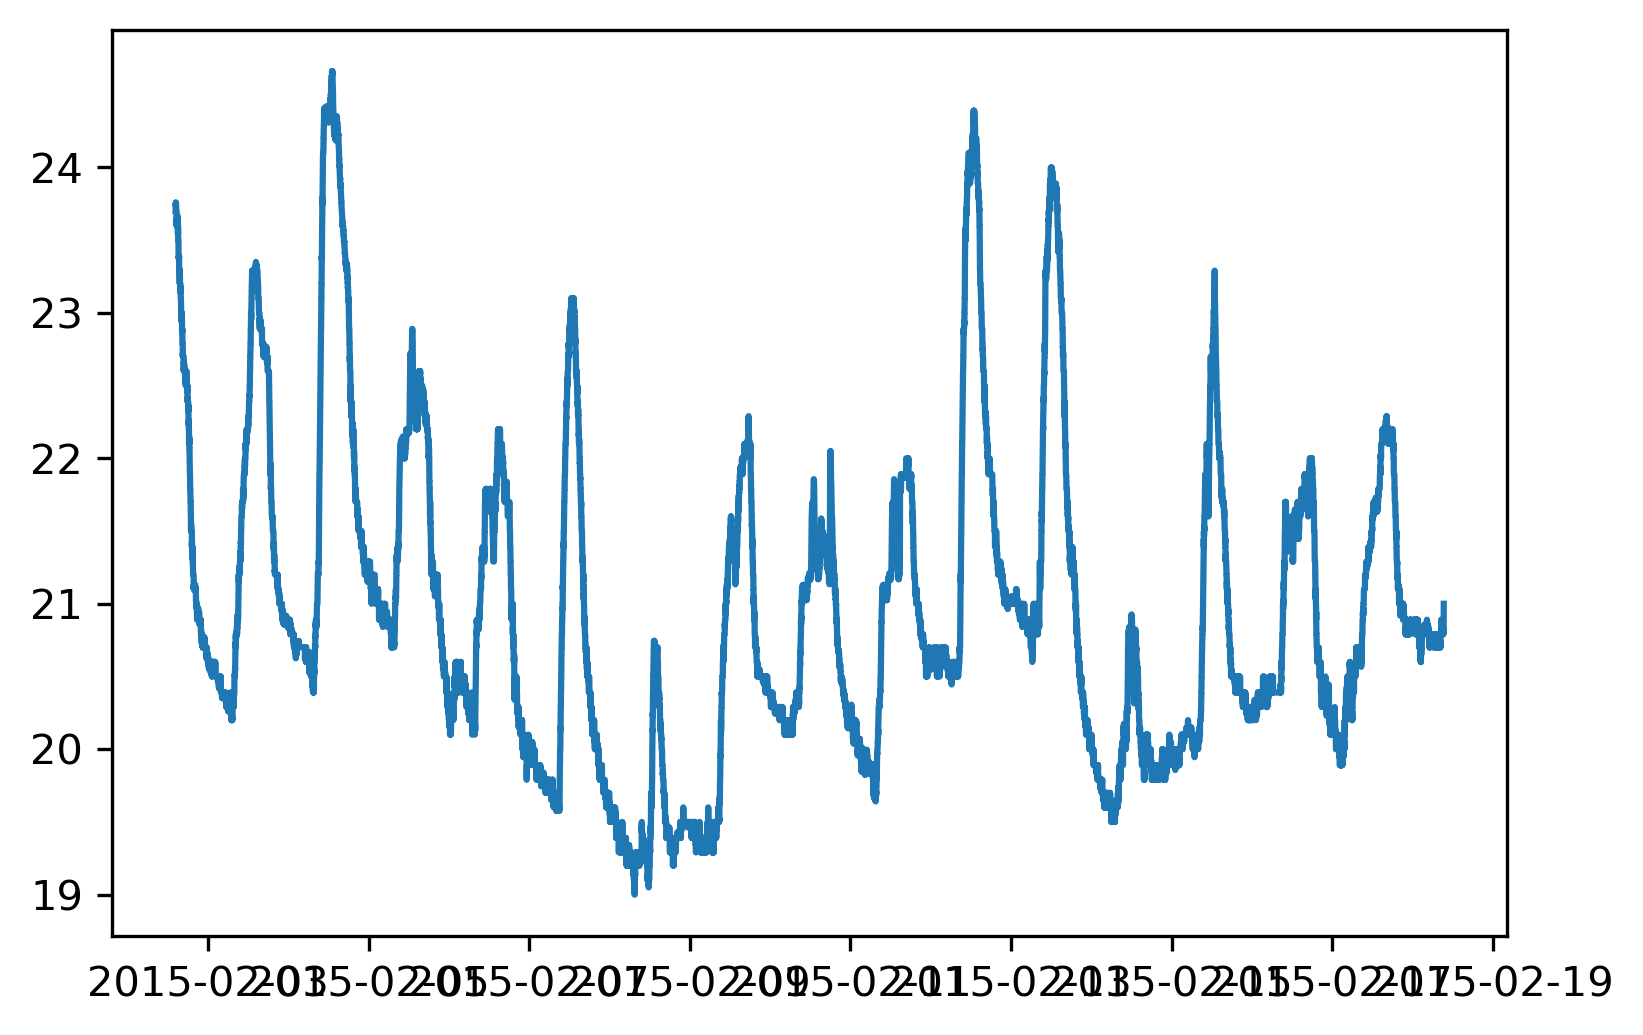

In [67]:
plt.plot(ts)

In [68]:
ts.to_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/temperatureTS.csv')